In [1]:
from utils import *

grid_rf = {
    'n_estimators': [100, 200, 300],
     'max_depth': [10, 20, 30],
     'min_samples_split': [2, 5, 10],
     'min_samples_leaf': [1, 2, 4]
}

grid_xgb = {
    'n_estimators': [50, 100, 150],
    'min_child_weight': [1, 3, 5],
    'max_leaves': [5, 20, 100]
}

# Caso
caso = 'amanda'
diferencial = 1

dataset = pd.read_csv(f'dataset_{caso}_{diferencial}.csv')
dataset

gender  sel_Ind1  sel_Grup  sel_Ind2  \
0        M         1         3         1   
1        M         3         2         2   
2        M         4         3         3   
3        M         3         2         4   
4        M         3         3         3   
..     ...       ...       ...       ...   
406      M         1         1         1   
407      M         1         3         3   
408      F         3         3         3   
409      M         3         3         3   
410      F         4         2         4   

                                          comment_Ind1  \
0    algoritmo x parece mejor elegir población dent...   
1    extranjeros normalmente jóvenes población asen...   
2    pienso cualquier servicio especialmente relaci...   
3    parecer aunque algoritmo x potencialmente gene...   
4    deberia escoger levemente algoritmo x algoritm...   
..                                                 ...   
406  puede implementar método alternativo detección...   
407  algoritmo diseñado pais significa mayoria pers...   
408  opinión podrían utilizar ambos usar mayor exac...   
409  mantengo respuesta anterior creo seria injusto...   
410  va haber error promedio poblacion general meno...   

                                          comment_Grup  \
0    perjudicar nadie elegimos 3 cosa algoritmo x a...   
1    creemos debería ser 2 pues acuerdo debería ser...   
2    inicialmente habia optado poner 4 ahora cambio...   
3    parecer aunque algoritmo x potencialmente gene...   
4    grupo analizaron distintas opiniones llego con...   
..                                                 ...   
406  puede implementar método alternativo detección...   
407  logaritmo va dirigido empresa publica pais pub...   
408  considero debería escoger algoritmo x importan...   
409  decidimos inclinarnos punto medio ambos algori...   
410  algoritmo x tendra margen error trata distinta...   

                                          comment_Ind2  \
0    opción cambio etapa 3 puesto todavía pienso pr...   
1    aunque preferible población migrante joven pro...   
2    caso postura cambio tomando cuenta algoritmo x...   
3    finalmente tomando discusión anterior postura ...   
4    mantengo firmemente postura mejor opcion elegi...   
..                                                 ...   
406  puede implementar método alternativo detección...   
407  cambie posicion argumento compañero buen porce...   
408  discusión anterior acuerdo preferible usar alg...   
409  percepción comienzo misma luego debate compañe...   
410  estapa 1 inclinaba estapa 2 hizo inclinarme ma...   

                                               summary  
0                        alo hola hola holaa q procede  
1                                        wenas holis 2  
2         ola hola aloo saludos cordiales compañeros 4  
3                               holaa holaa holaa hola  
4                       holaa holaa holaaa wenaaa hola  
..                                                 ...  
406                               buenas gent3 1 x2 x3  
407                             q chat hola puse dos 1  
408       ª creo deberíamos elegir algoritmo x w  olas  
409  buenas buenas lel parecer primera pondria punt...  
410                           hola hola oal ando calle  

[411 rows x 8 columns]

# Modelos clásicos

## Modelo base

In [2]:
df_train, df_test, y_train, y_test, categorical_preprocessing, text_preprocessing = preprocessing(
    dataset,
    gender=False, 
    comment_Ind2=True, 
    sel_Ind1=True
)
df_train

sel_Ind1  sel_Grup  Ind1__0si  Ind1__1  Ind1__100  Ind1__15  Ind1__155  \
180       1.0       1.0          0        0          0         0          0   
201       0.0       3.0          0        0          0         0          0   
174       1.0       1.0          0        0          0         0          0   
195       2.0       1.0          0        0          0         0          0   
187       1.0       0.0          0        0          0         0          0   
..        ...       ...        ...      ...        ...       ...        ...   
155       1.0       2.0          0        0          0         0          0   
102       1.0       4.0          0        0          0         0          0   
189       2.0       3.0          0        0          0         0          0   
239       1.0       2.0          0        0          0         0          0   
15        0.0       5.0          0        0          0         0          0   

     Ind1__2  Ind1__3  Ind1__39  ...  Chat__wenap  Chat__wenass  Chat__wifi  \
180        0        0         0  ...            0             0           0   
201        0        0         0  ...            0             0           0   
174        0        0         0  ...            0             0           0   
195        0        0         0  ...            0             0           0   
187        0        0         0  ...            0             0           0   
..       ...      ...       ...  ...          ...           ...         ...   
155        0        0         0  ...            0             0           0   
102        0        0         0  ...            0             0           0   
189        0        0         0  ...            0             0           0   
239        0        0         0  ...            0             0           0   
15         0        0         0  ...            0             0           0   

     Chat__wol  Chat__x  Chat__x2  Chat__x3  Chat__xat  Chat__xd  Chat__ª  
180          0        0         0         0          0         0        0  
201          0        0         0         0          0         0        0  
174          0        0         0         0          0         0        0  
195          0        0         0         0          0         0        0  
187          0        0         0         0          0         0        0  
..         ...      ...       ...       ...        ...       ...      ...  
155          0        0         0         0          0         0        0  
102          0        0         0         0          0         0        0  
189          0        0         0         0          0         0        0  
239          0        0         0         0          0         0        0  
15           0        0         0         0          0         0        0  

[328 rows x 3904 columns]

In [3]:
categorical_preprocessing

ColumnTransformer(transformers=[('sel_etapa',
                                 Pipeline(steps=[('ordinal_encoder',
                                                  OrdinalEncoder())]),
                                 ['sel_Ind1', 'sel_Grup', 'sel_Ind2'])])

In [4]:
text_preprocessing

ColumnTransformer(transformers=[('Ind1',
                                 CountVectorizer(token_pattern=None,
                                                 tokenizer=<utils.StemmerTokenizer object at 0x000002BDF4121000>),
                                 'comment_Ind1'),
                                ('Grup',
                                 CountVectorizer(token_pattern=None,
                                                 tokenizer=<utils.StemmerTokenizer object at 0x000002BDF4121000>),
                                 'comment_Grup'),
                                ('Ind2',
                                 CountVectorizer(token_pattern=None,
                                                 tokenizer=<utils.StemmerTokenizer object at 0x000002BDF4121000>),
                                 'comment_Ind2'),
                                ('Chat',
                                 CountVectorizer(token_pattern=None,
                                                 tokenizer=<utils.StemmerTokenizer object at 0x000002BDF4121000>),
                                 'summary')])

In [5]:
df_train

sel_Ind1  sel_Grup  Ind1__0si  Ind1__1  Ind1__100  Ind1__15  Ind1__155  \
180       1.0       1.0          0        0          0         0          0   
201       0.0       3.0          0        0          0         0          0   
174       1.0       1.0          0        0          0         0          0   
195       2.0       1.0          0        0          0         0          0   
187       1.0       0.0          0        0          0         0          0   
..        ...       ...        ...      ...        ...       ...        ...   
155       1.0       2.0          0        0          0         0          0   
102       1.0       4.0          0        0          0         0          0   
189       2.0       3.0          0        0          0         0          0   
239       1.0       2.0          0        0          0         0          0   
15        0.0       5.0          0        0          0         0          0   

     Ind1__2  Ind1__3  Ind1__39  ...  Chat__wenap  Chat__wenass  Chat__wifi  \
180        0        0         0  ...            0             0           0   
201        0        0         0  ...            0             0           0   
174        0        0         0  ...            0             0           0   
195        0        0         0  ...            0             0           0   
187        0        0         0  ...            0             0           0   
..       ...      ...       ...  ...          ...           ...         ...   
155        0        0         0  ...            0             0           0   
102        0        0         0  ...            0             0           0   
189        0        0         0  ...            0             0           0   
239        0        0         0  ...            0             0           0   
15         0        0         0  ...            0             0           0   

     Chat__wol  Chat__x  Chat__x2  Chat__x3  Chat__xat  Chat__xd  Chat__ª  
180          0        0         0         0          0         0        0  
201          0        0         0         0          0         0        0  
174          0        0         0         0          0         0        0  
195          0        0         0         0          0         0        0  
187          0        0         0         0          0         0        0  
..         ...      ...       ...       ...        ...       ...      ...  
155          0        0         0         0          0         0        0  
102          0        0         0         0          0         0        0  
189          0        0         0         0          0         0        0  
239          0        0         0         0          0         0        0  
15           0        0         0         0          0         0        0  

[328 rows x 3904 columns]

In [6]:
dummy_model, rf_best_model, xgb_best_model = train_models(df_train, df_test, y_train, y_test, grid_rf, grid_xgb)

Dummy classifier
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00        22
         0.0       0.53      1.00      0.69        44
         1.0       0.00      0.00      0.00        17

    accuracy                           0.53        83
   macro avg       0.18      0.33      0.23        83
weighted avg       0.28      0.53      0.37        83

Random Forest classifier
Best Hyperparameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
              precision    recall  f1-score   support

        -1.0       0.33      0.05      0.08        22
         0.0       0.53      0.95      0.68        44
         1.0       1.00      0.06      0.11        17

    accuracy                           0.53        83
   macro avg       0.62      0.35      0.29        83
weighted avg       0.58      0.53      0.41        83

XGBoost classifier
Best Hyperparameters: {'max_leaves': 5, 'min_child_weight': 5, 'n_est

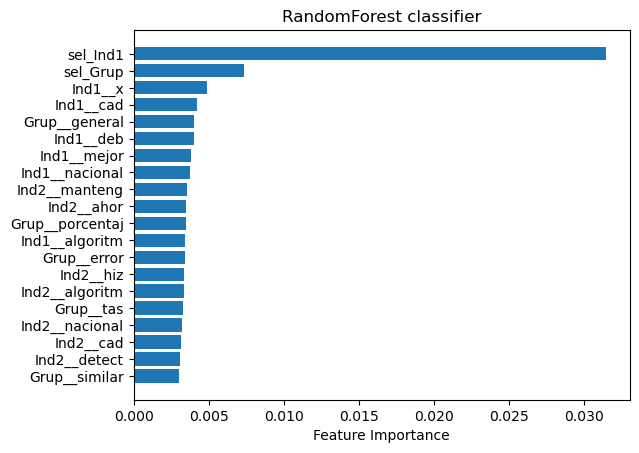

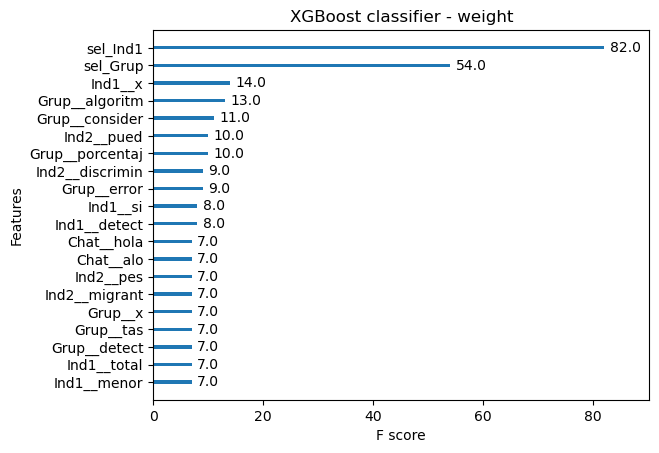

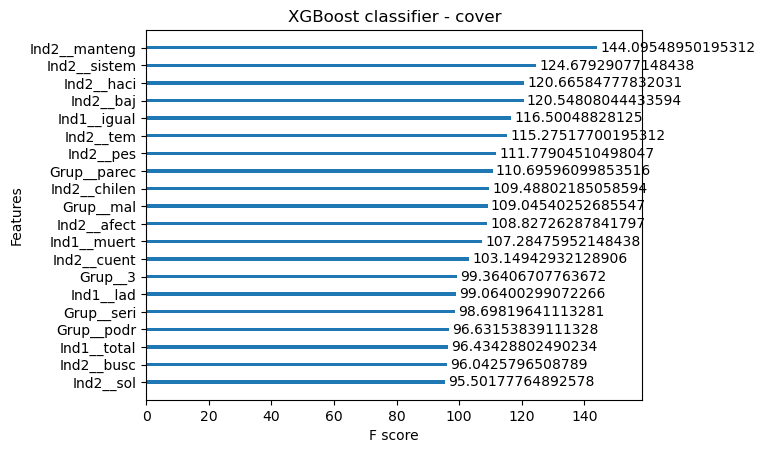

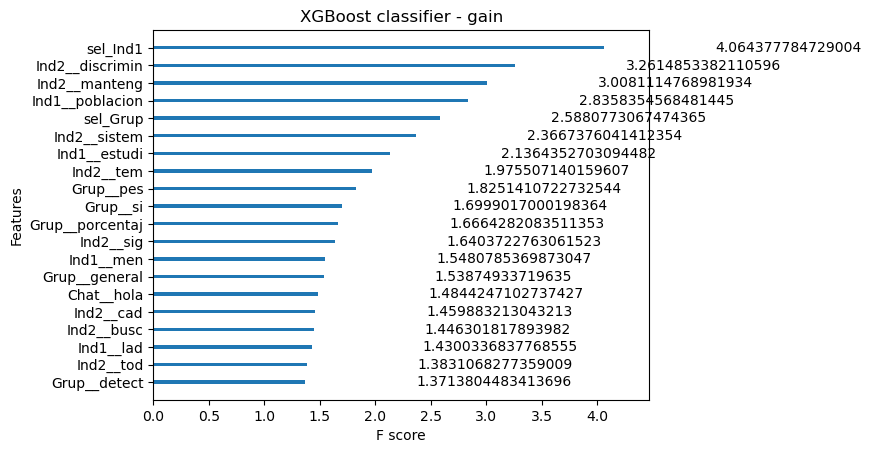

In [7]:
plot_importance_models(rf_best_model, xgb_best_model)

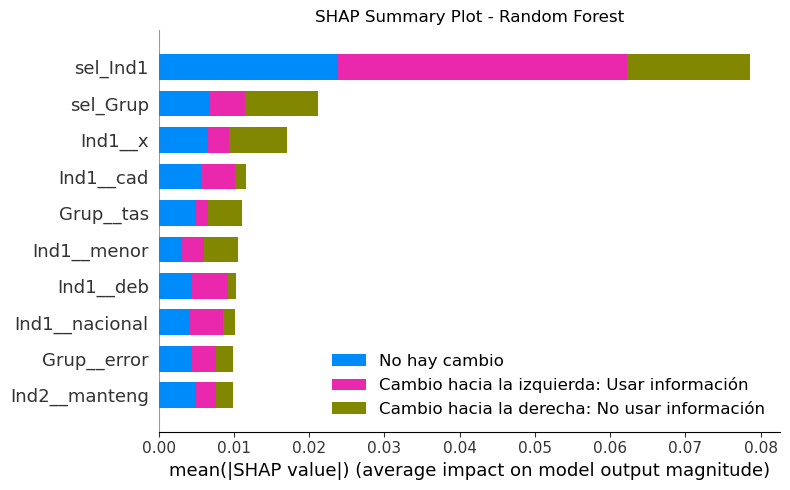

In [8]:
summary_plot(rf_best_model, df_train, 'SHAP Summary Plot - Random Forest')

[17:10:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


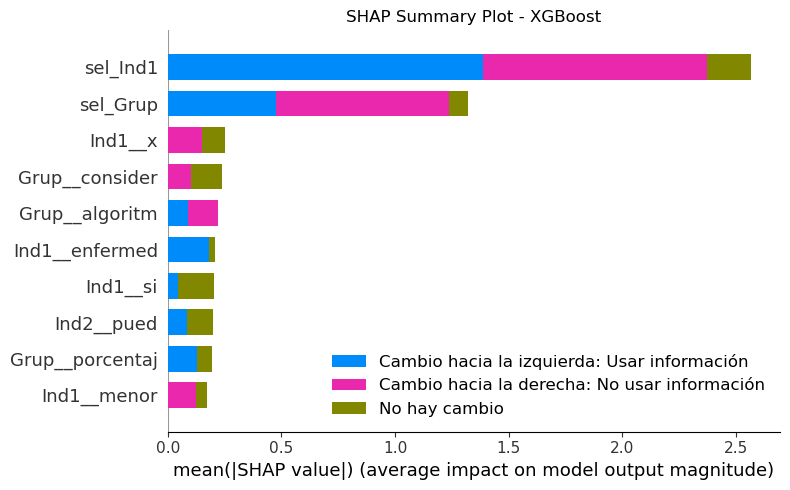

In [9]:
summary_plot(xgb_best_model, df_train, 'SHAP Summary Plot - XGBoost')

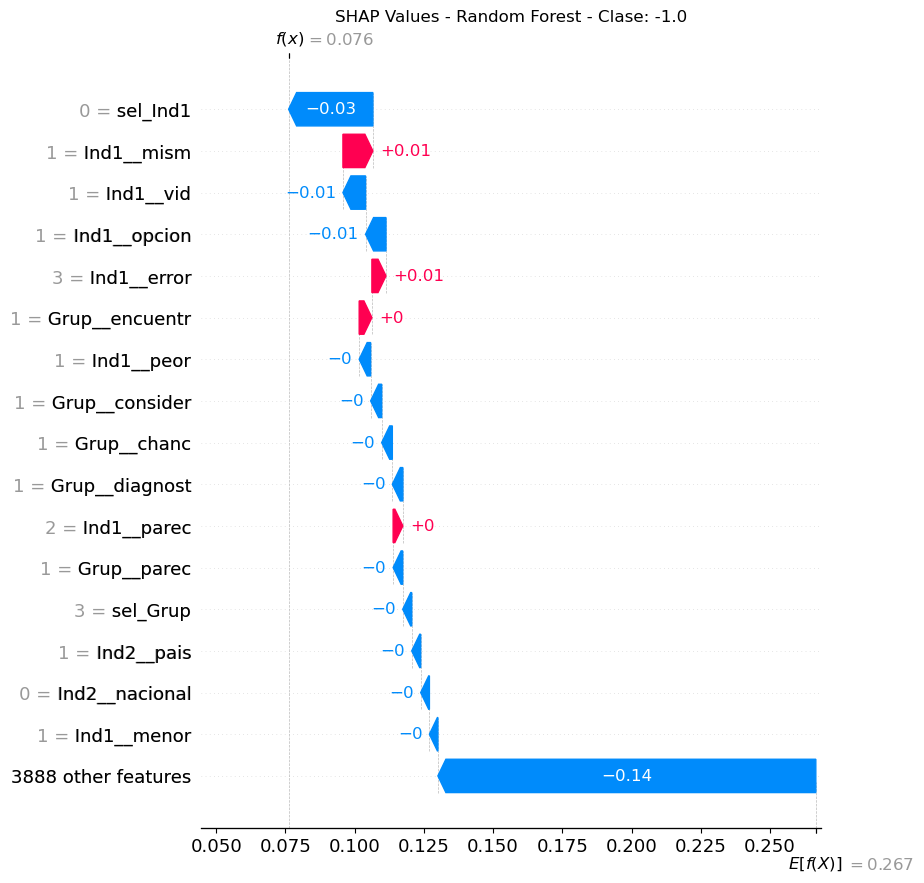

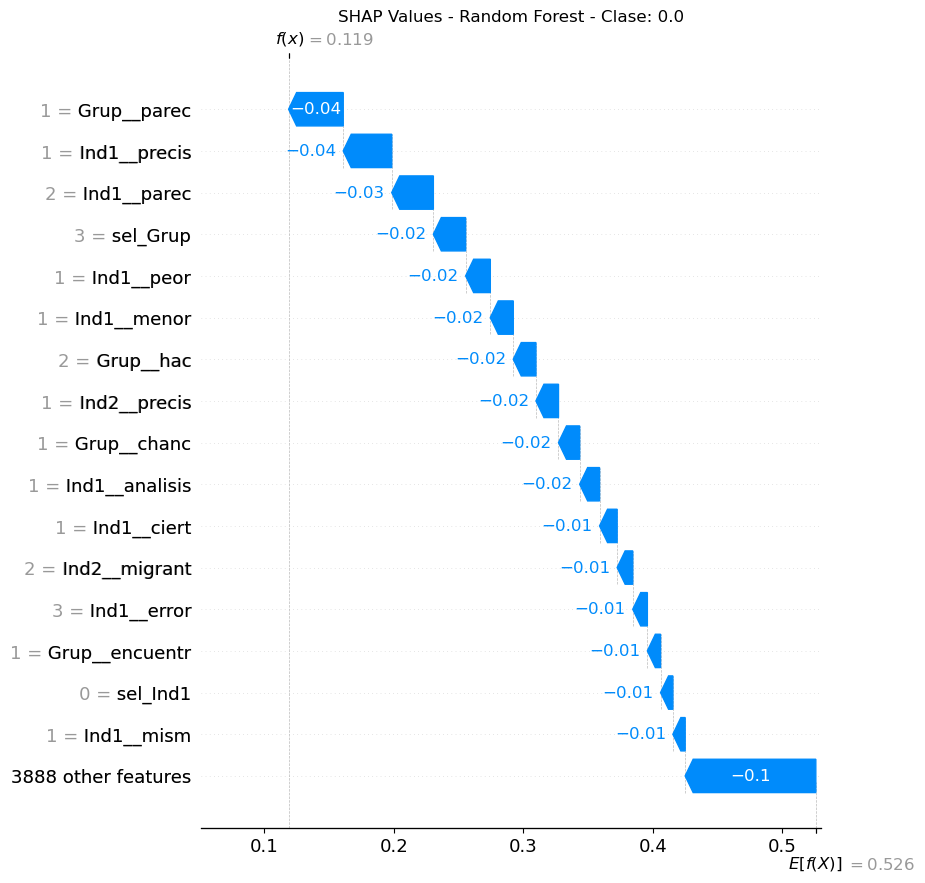

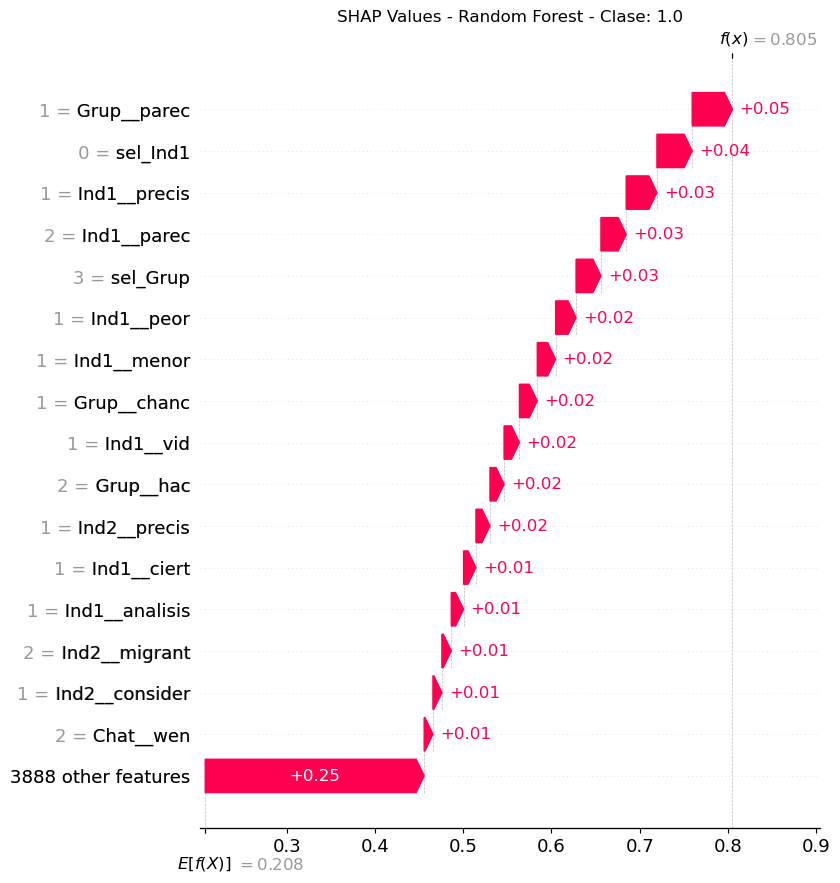

In [10]:
idx=1

individual_explanation(idx, rf_best_model, df_train, 'SHAP Values - Random Forest')

[17:11:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


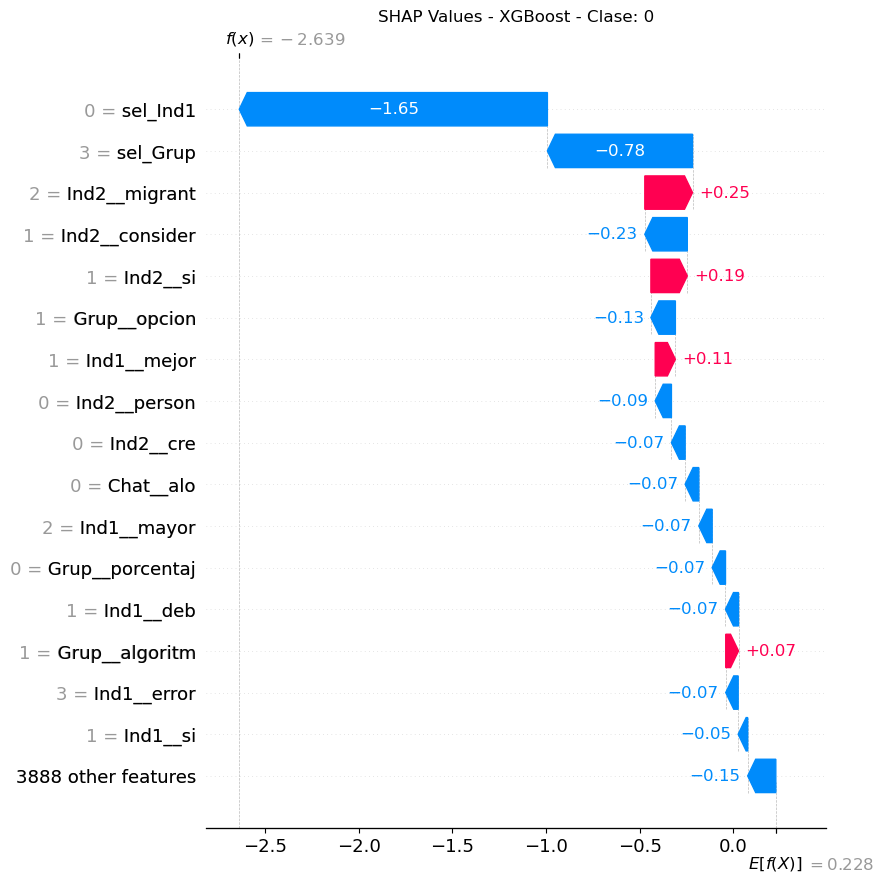

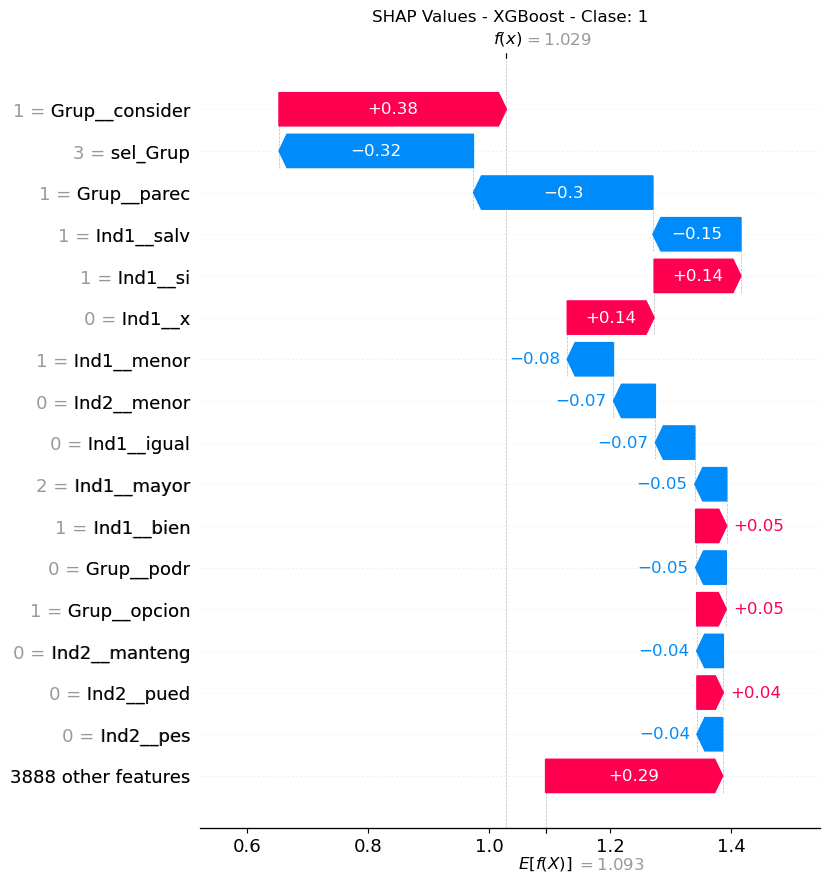

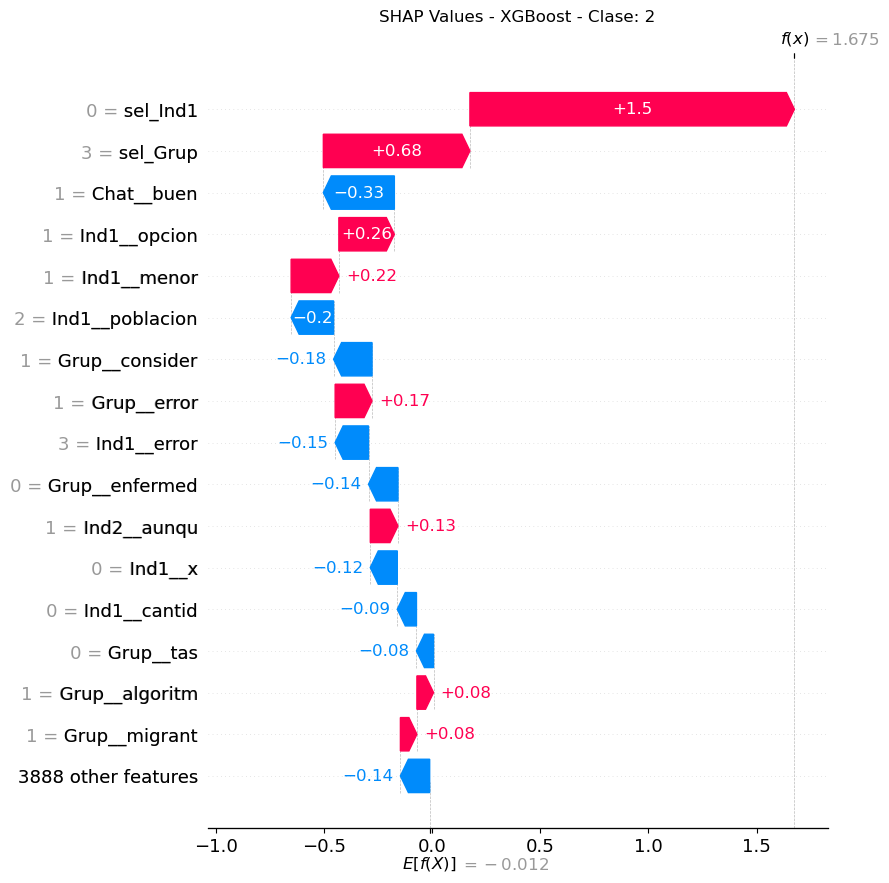

In [11]:
idx=1

individual_explanation(idx, xgb_best_model, df_train, 'SHAP Values - XGBoost')

## Modelo 2. Agregar género

In [12]:
df_train, df_test, y_train, y_test, categorical_preprocessing, text_preprocessing = preprocessing(
    dataset,
    gender=True, 
    comment_Ind2=True, 
    sel_Ind1=True
)
df_train

sel_Ind1  sel_Grup  gender:M  gender:F  gender:O  Ind1__0si  Ind1__1  \
180       1.0       1.0       0.0       1.0       0.0          0        0   
201       0.0       3.0       1.0       0.0       0.0          0        0   
174       1.0       1.0       1.0       0.0       0.0          0        0   
195       2.0       1.0       0.0       1.0       0.0          0        0   
187       1.0       0.0       1.0       0.0       0.0          0        0   
..        ...       ...       ...       ...       ...        ...      ...   
155       1.0       2.0       1.0       0.0       0.0          0        0   
102       1.0       4.0       1.0       0.0       0.0          0        0   
189       2.0       3.0       1.0       0.0       0.0          0        0   
239       1.0       2.0       1.0       0.0       0.0          0        0   
15        0.0       5.0       1.0       0.0       0.0          0        0   

     Ind1__100  Ind1__15  Ind1__155  ...  Chat__wenap  Chat__wenass  \
180          0         0          0  ...            0             0   
201          0         0          0  ...            0             0   
174          0         0          0  ...            0             0   
195          0         0          0  ...            0             0   
187          0         0          0  ...            0             0   
..         ...       ...        ...  ...          ...           ...   
155          0         0          0  ...            0             0   
102          0         0          0  ...            0             0   
189          0         0          0  ...            0             0   
239          0         0          0  ...            0             0   
15           0         0          0  ...            0             0   

     Chat__wifi  Chat__wol  Chat__x  Chat__x2  Chat__x3  Chat__xat  Chat__xd  \
180           0          0        0         0         0          0         0   
201           0          0        0         0         0          0         0   
174           0          0        0         0         0          0         0   
195           0          0        0         0         0          0         0   
187           0          0        0         0         0          0         0   
..          ...        ...      ...       ...       ...        ...       ...   
155           0          0        0         0         0          0         0   
102           0          0        0         0         0          0         0   
189           0          0        0         0         0          0         0   
239           0          0        0         0         0          0         0   
15            0          0        0         0         0          0         0   

     Chat__ª  
180        0  
201        0  
174        0  
195        0  
187        0  
..       ...  
155        0  
102        0  
189        0  
239        0  
15         0  

[328 rows x 3907 columns]

In [13]:
categorical_preprocessing

ColumnTransformer(transformers=[('sel_etapa',
                                 Pipeline(steps=[('ordinal_encoder',
                                                  OrdinalEncoder())]),
                                 ['sel_Ind1', 'sel_Grup', 'sel_Ind2']),
                                ('gender',
                                 Pipeline(steps=[('extract',
                                                  ColumnExtractor(columns=['gender'])),
                                                 ('onehot_encoder',
                                                  OneHotEncoder(categories=[['M',
                                                                             'F',
                                                                             'O']],
                                                                sparse_output=False))]),
                                 ['gender'])])

In [14]:
text_preprocessing

ColumnTransformer(transformers=[('Ind1',
                                 CountVectorizer(token_pattern=None,
                                                 tokenizer=<utils.StemmerTokenizer object at 0x000002BD86121120>),
                                 'comment_Ind1'),
                                ('Grup',
                                 CountVectorizer(token_pattern=None,
                                                 tokenizer=<utils.StemmerTokenizer object at 0x000002BD86121120>),
                                 'comment_Grup'),
                                ('Ind2',
                                 CountVectorizer(token_pattern=None,
                                                 tokenizer=<utils.StemmerTokenizer object at 0x000002BD86121120>),
                                 'comment_Ind2'),
                                ('Chat',
                                 CountVectorizer(token_pattern=None,
                                                 tokenizer=<utils.StemmerTokenizer object at 0x000002BD86121120>),
                                 'summary')])

In [15]:
dummy_model, rf_best_model, xgb_best_model = train_models(df_train, df_test, y_train, y_test, grid_rf, grid_xgb)

Dummy classifier
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00        22
         0.0       0.53      1.00      0.69        44
         1.0       0.00      0.00      0.00        17

    accuracy                           0.53        83
   macro avg       0.18      0.33      0.23        83
weighted avg       0.28      0.53      0.37        83

Random Forest classifier
Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00        22
         0.0       0.53      1.00      0.69        44
         1.0       0.00      0.00      0.00        17

    accuracy                           0.53        83
   macro avg       0.18      0.33      0.23        83
weighted avg       0.28      0.53      0.37        83

XGBoost classifier
Best Hyperparameters: {'max_leaves': 5, 'min_child_weight': 3, 'n_est

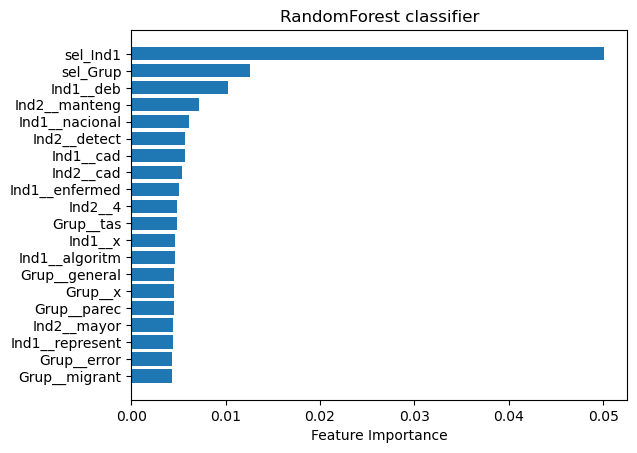

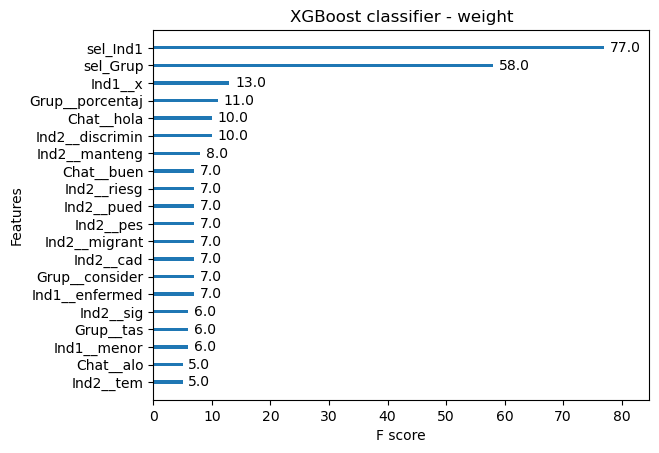

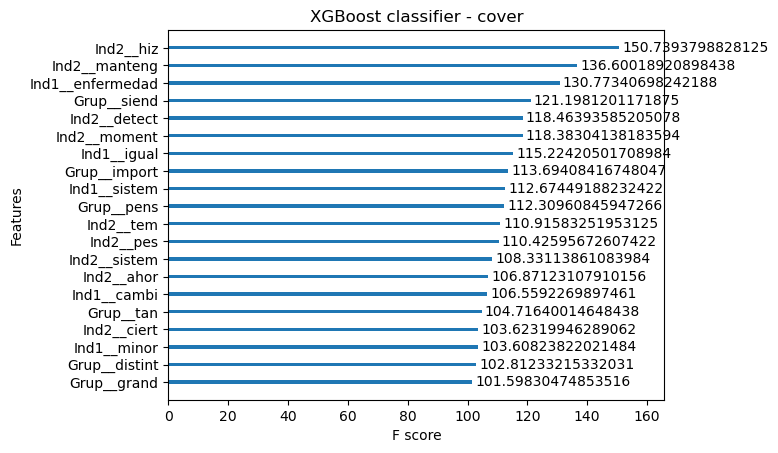

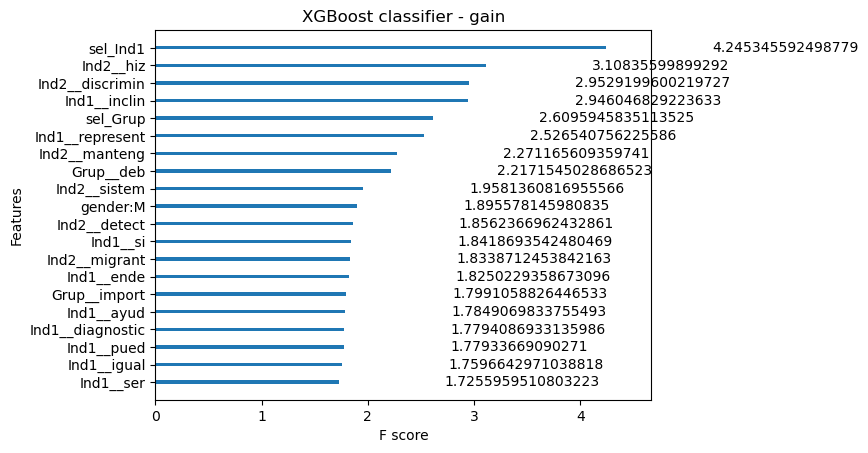

In [16]:
plot_importance_models(rf_best_model, xgb_best_model)

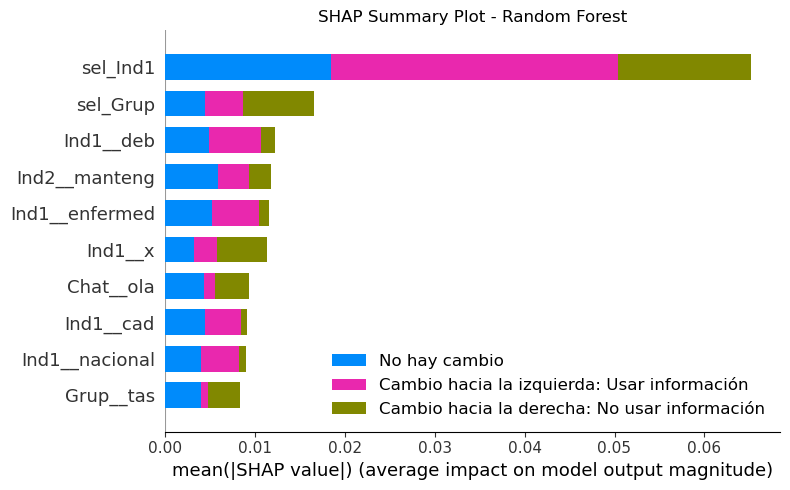

In [17]:
summary_plot(rf_best_model, df_train, 'SHAP Summary Plot - Random Forest')

[17:14:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


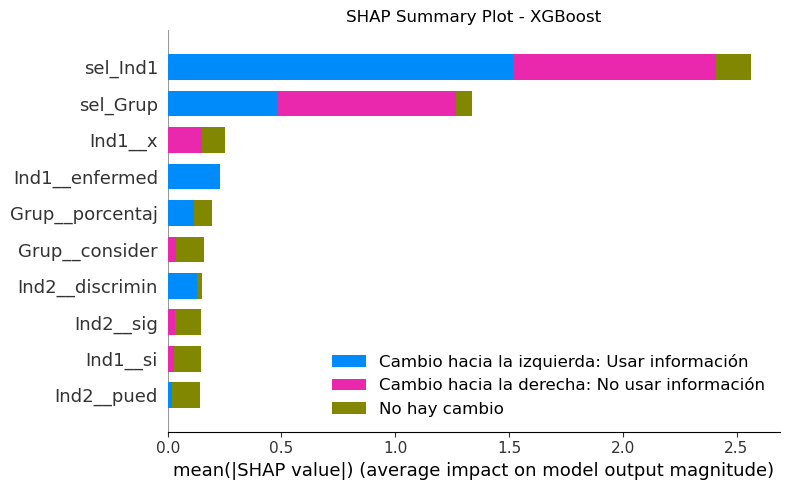

In [18]:
summary_plot(xgb_best_model, df_train, 'SHAP Summary Plot - XGBoost')

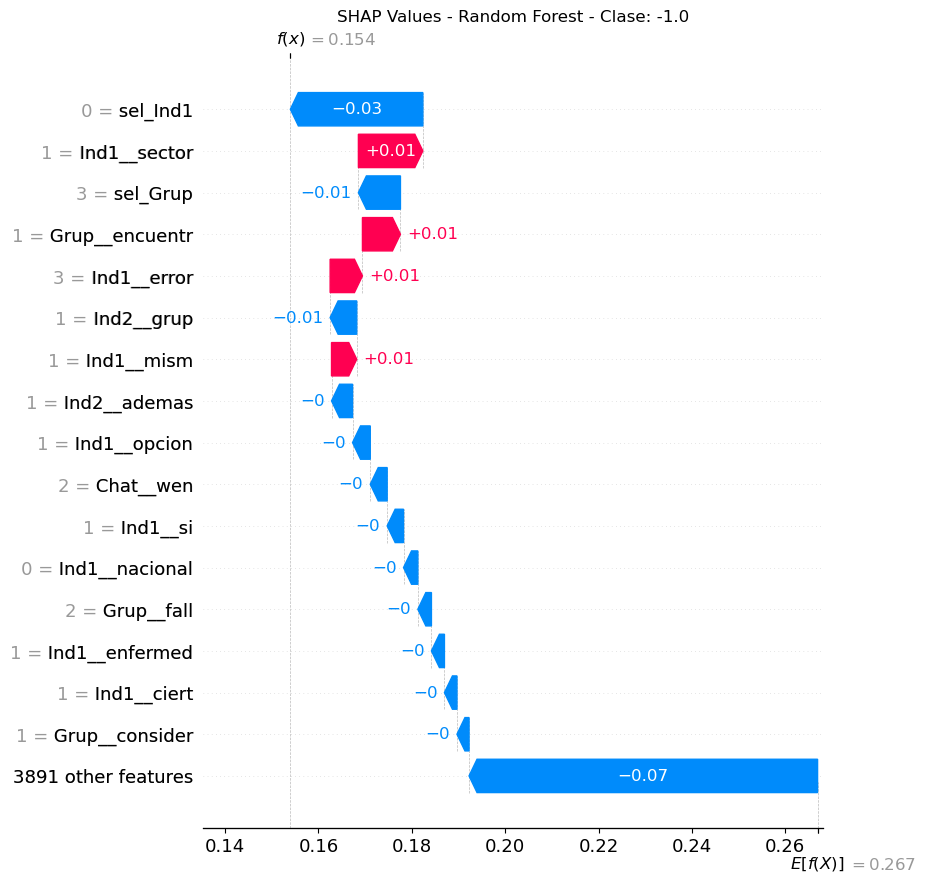

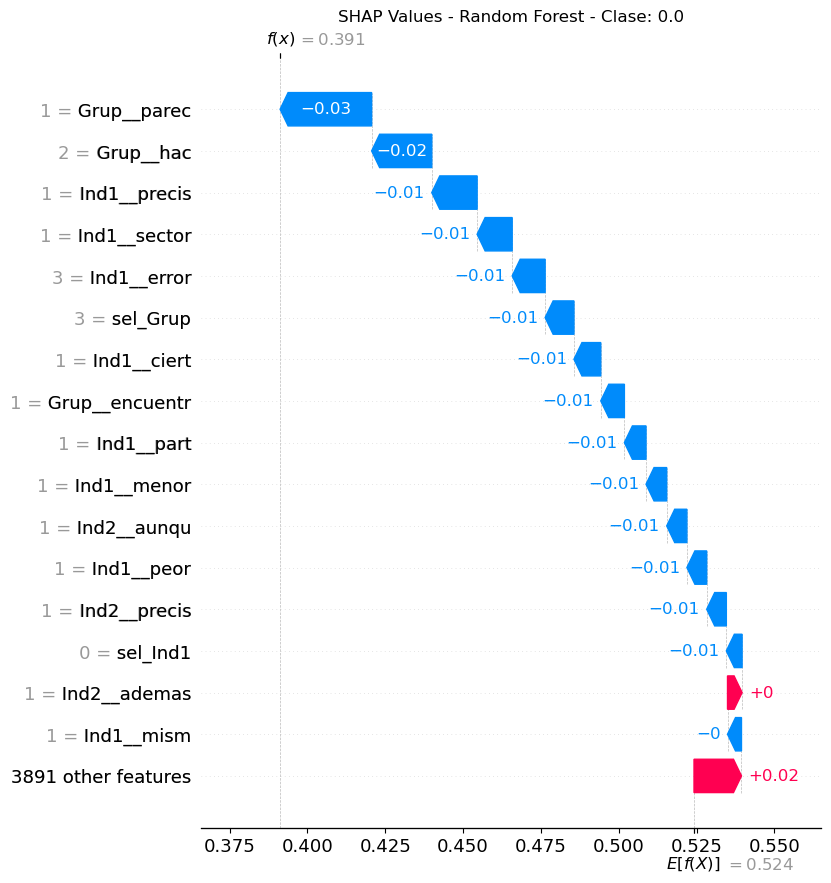

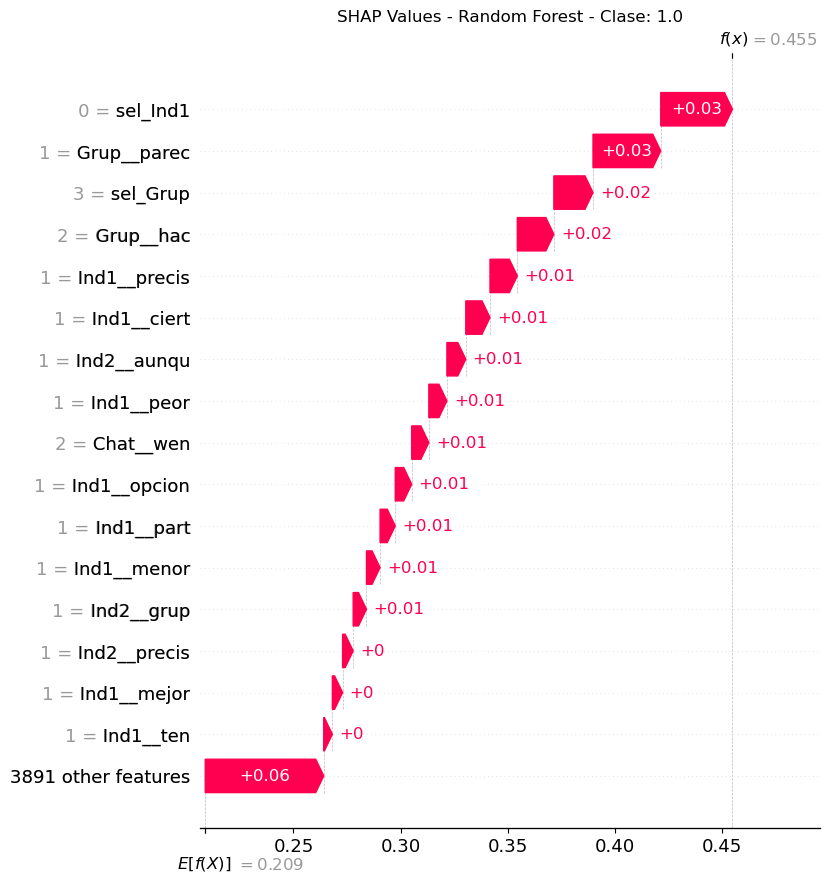

In [19]:
idx=1

individual_explanation(idx, rf_best_model, df_train, 'SHAP Values - Random Forest')

[17:15:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


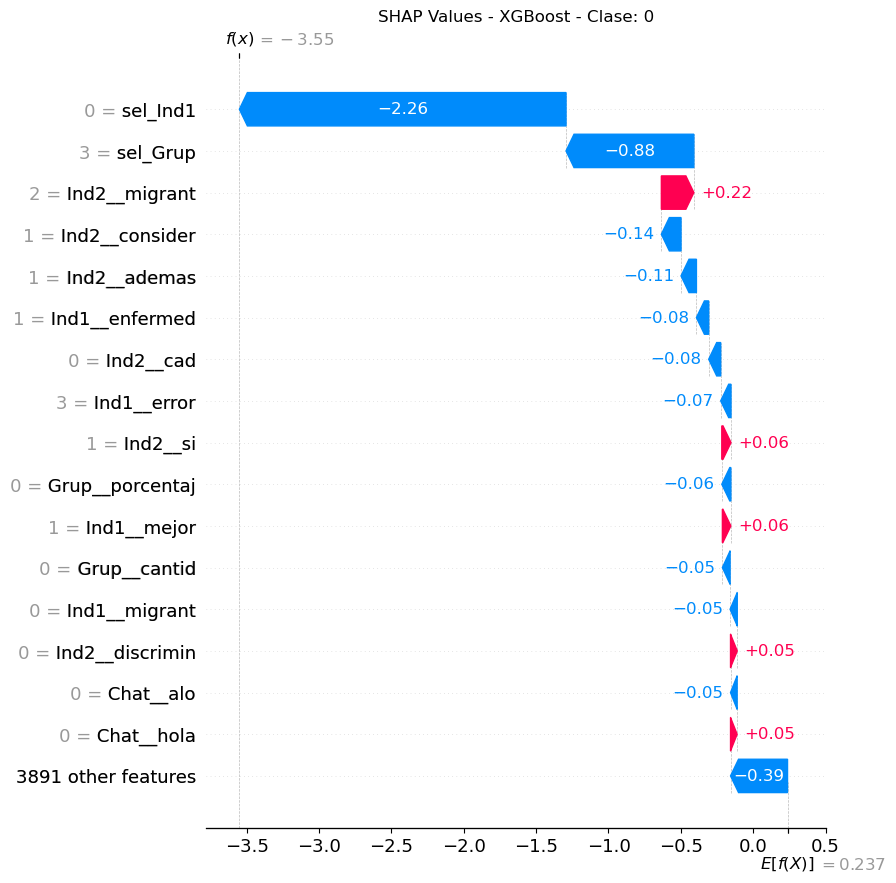

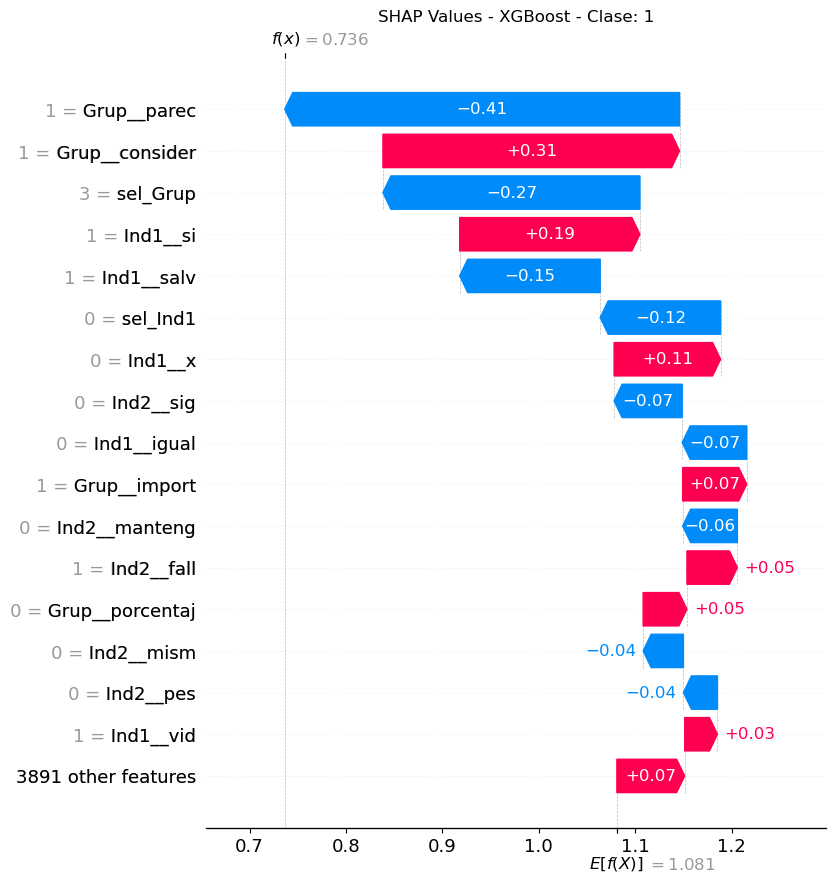

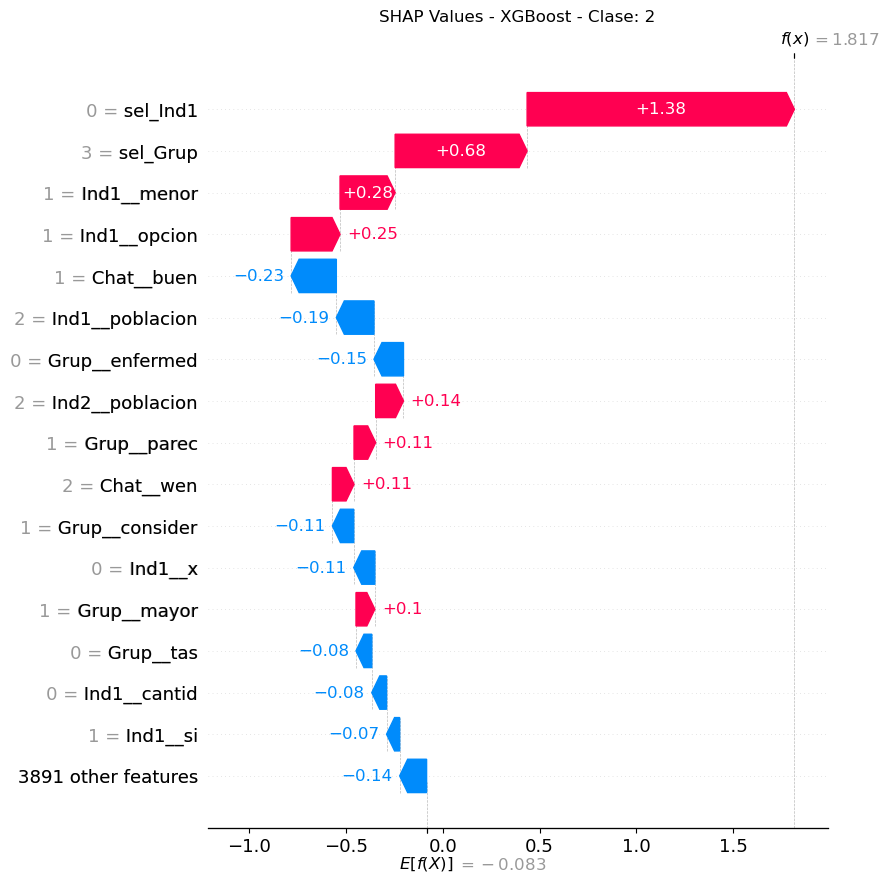

In [20]:
idx=1

individual_explanation(idx, xgb_best_model, df_train, 'SHAP Values - XGBoost')

## Modelo 3. Quitar selección 1

In [21]:
df_train, df_test, y_train, y_test, categorical_preprocessing, text_preprocessing = preprocessing(
    dataset,
    gender=True, 
    comment_Ind2=True, 
    sel_Ind1=False
)
df_train

sel_Grup  gender:M  gender:F  gender:O  Ind1__0si  Ind1__1  Ind1__100  \
180       1.0       0.0       1.0       0.0          0        0          0   
201       3.0       1.0       0.0       0.0          0        0          0   
174       1.0       1.0       0.0       0.0          0        0          0   
195       1.0       0.0       1.0       0.0          0        0          0   
187       0.0       1.0       0.0       0.0          0        0          0   
..        ...       ...       ...       ...        ...      ...        ...   
155       2.0       1.0       0.0       0.0          0        0          0   
102       4.0       1.0       0.0       0.0          0        0          0   
189       3.0       1.0       0.0       0.0          0        0          0   
239       2.0       1.0       0.0       0.0          0        0          0   
15        5.0       1.0       0.0       0.0          0        0          0   

     Ind1__15  Ind1__155  Ind1__2  ...  Chat__wenap  Chat__wenass  Chat__wifi  \
180         0          0        0  ...            0             0           0   
201         0          0        0  ...            0             0           0   
174         0          0        0  ...            0             0           0   
195         0          0        0  ...            0             0           0   
187         0          0        0  ...            0             0           0   
..        ...        ...      ...  ...          ...           ...         ...   
155         0          0        0  ...            0             0           0   
102         0          0        0  ...            0             0           0   
189         0          0        0  ...            0             0           0   
239         0          0        0  ...            0             0           0   
15          0          0        0  ...            0             0           0   

     Chat__wol  Chat__x  Chat__x2  Chat__x3  Chat__xat  Chat__xd  Chat__ª  
180          0        0         0         0          0         0        0  
201          0        0         0         0          0         0        0  
174          0        0         0         0          0         0        0  
195          0        0         0         0          0         0        0  
187          0        0         0         0          0         0        0  
..         ...      ...       ...       ...        ...       ...      ...  
155          0        0         0         0          0         0        0  
102          0        0         0         0          0         0        0  
189          0        0         0         0          0         0        0  
239          0        0         0         0          0         0        0  
15           0        0         0         0          0         0        0  

[328 rows x 3906 columns]

In [22]:
categorical_preprocessing

ColumnTransformer(transformers=[('sel_etapa',
                                 Pipeline(steps=[('ordinal_encoder',
                                                  OrdinalEncoder())]),
                                 ['sel_Ind1', 'sel_Grup', 'sel_Ind2']),
                                ('gender',
                                 Pipeline(steps=[('extract',
                                                  ColumnExtractor(columns=['gender'])),
                                                 ('onehot_encoder',
                                                  OneHotEncoder(categories=[['M',
                                                                             'F',
                                                                             'O']],
                                                                sparse_output=False))]),
                                 ['gender'])])

In [23]:
text_preprocessing

ColumnTransformer(transformers=[('Ind1',
                                 CountVectorizer(token_pattern=None,
                                                 tokenizer=<utils.StemmerTokenizer object at 0x000002BD86121840>),
                                 'comment_Ind1'),
                                ('Grup',
                                 CountVectorizer(token_pattern=None,
                                                 tokenizer=<utils.StemmerTokenizer object at 0x000002BD86121840>),
                                 'comment_Grup'),
                                ('Ind2',
                                 CountVectorizer(token_pattern=None,
                                                 tokenizer=<utils.StemmerTokenizer object at 0x000002BD86121840>),
                                 'comment_Ind2'),
                                ('Chat',
                                 CountVectorizer(token_pattern=None,
                                                 tokenizer=<utils.StemmerTokenizer object at 0x000002BD86121840>),
                                 'summary')])

In [24]:
dummy_model, rf_best_model, xgb_best_model = train_models(df_train, df_test, y_train, y_test, grid_rf, grid_xgb)

Dummy classifier
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00        22
         0.0       0.53      1.00      0.69        44
         1.0       0.00      0.00      0.00        17

    accuracy                           0.53        83
   macro avg       0.18      0.33      0.23        83
weighted avg       0.28      0.53      0.37        83

Random Forest classifier
Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00        22
         0.0       0.52      0.98      0.68        44
         1.0       0.00      0.00      0.00        17

    accuracy                           0.52        83
   macro avg       0.17      0.33      0.23        83
weighted avg       0.28      0.52      0.36        83

XGBoost classifier
Best Hyperparameters: {'max_leaves': 20, 'min_child_weight': 3, 'n_e

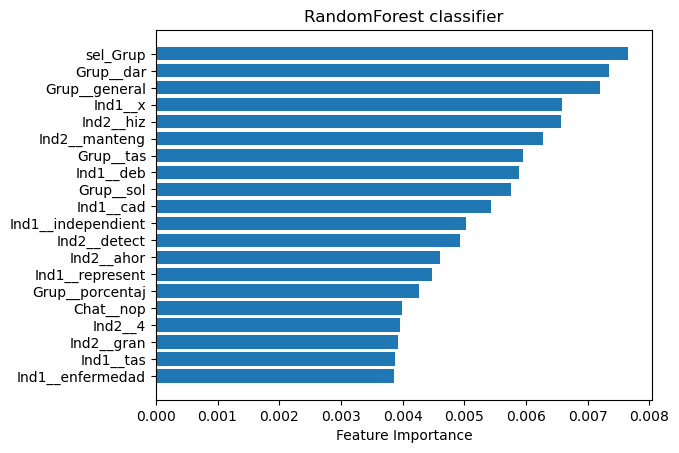

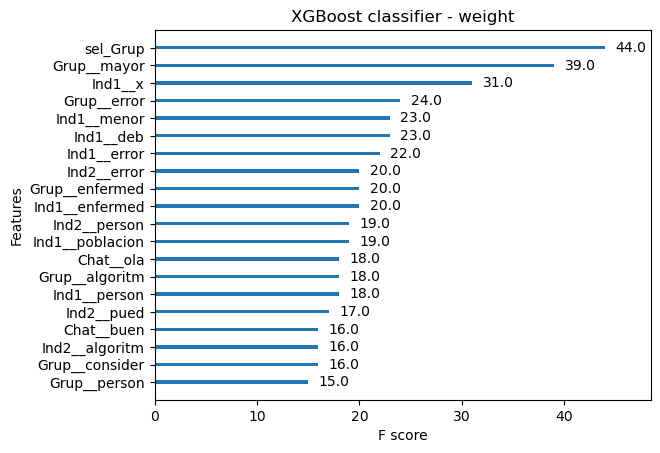

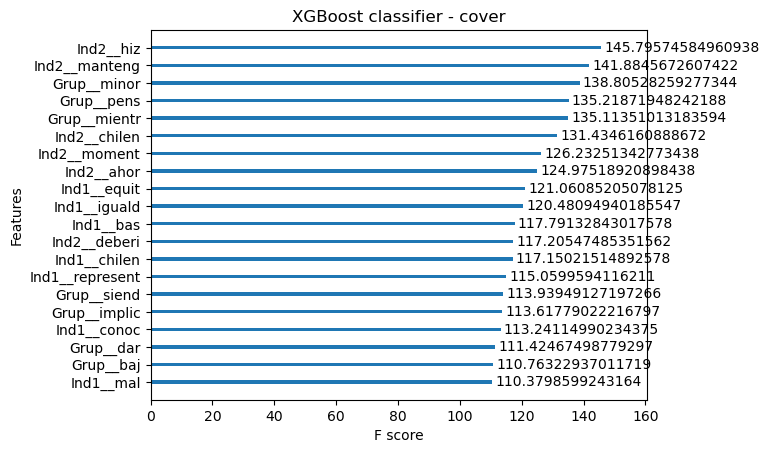

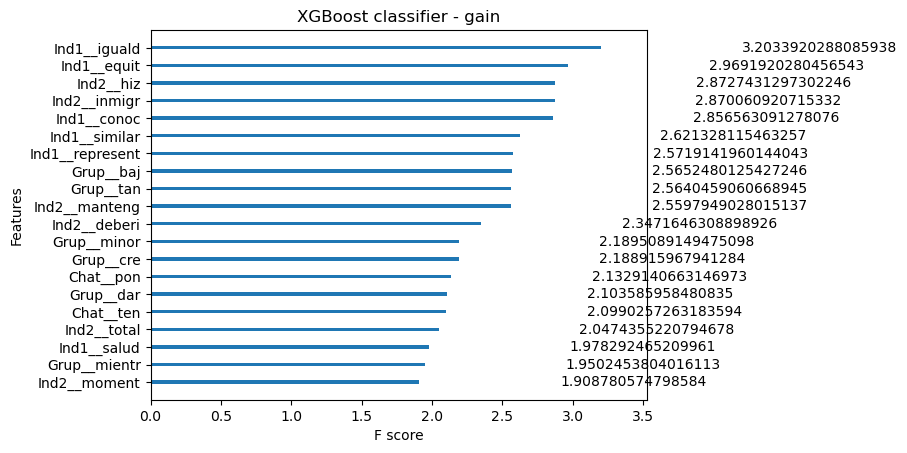

In [25]:
plot_importance_models(rf_best_model, xgb_best_model)

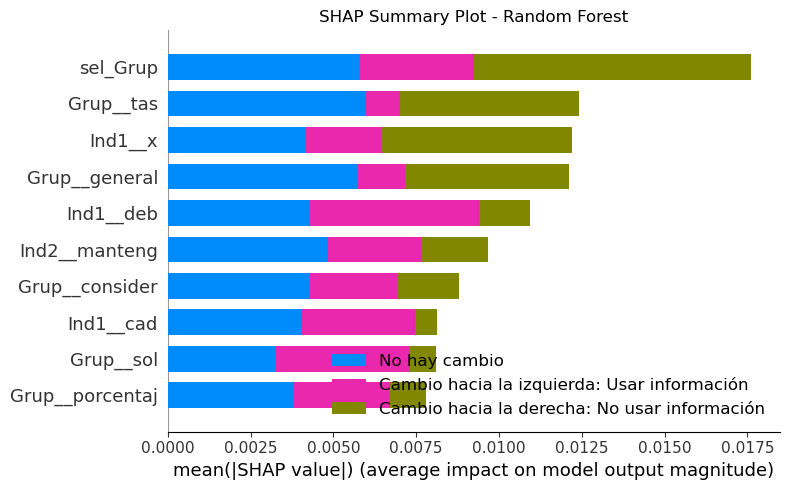

In [26]:
summary_plot(rf_best_model, df_train, 'SHAP Summary Plot - Random Forest')

[17:18:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


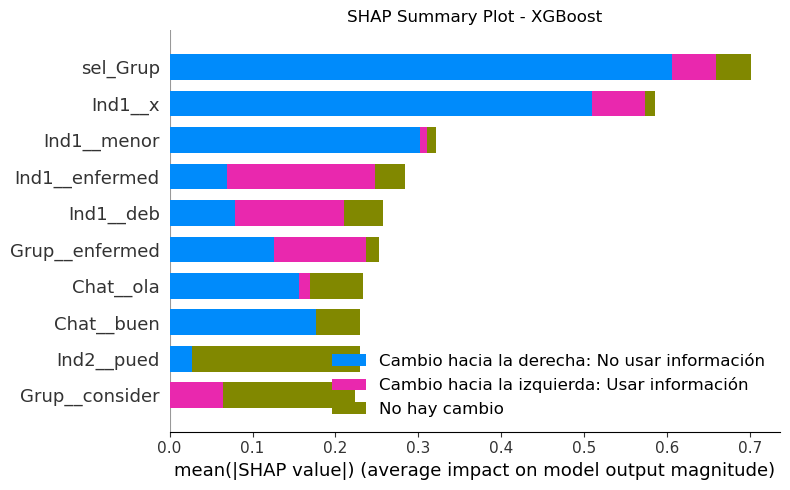

In [27]:
summary_plot(xgb_best_model, df_train, 'SHAP Summary Plot - XGBoost')

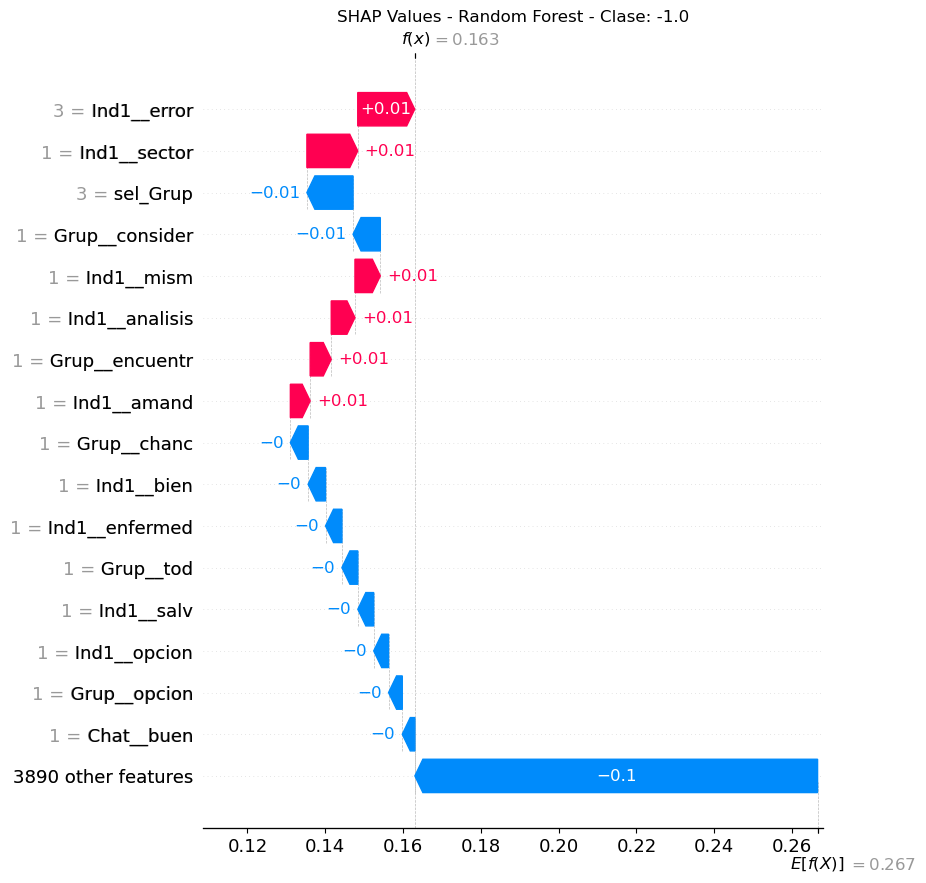

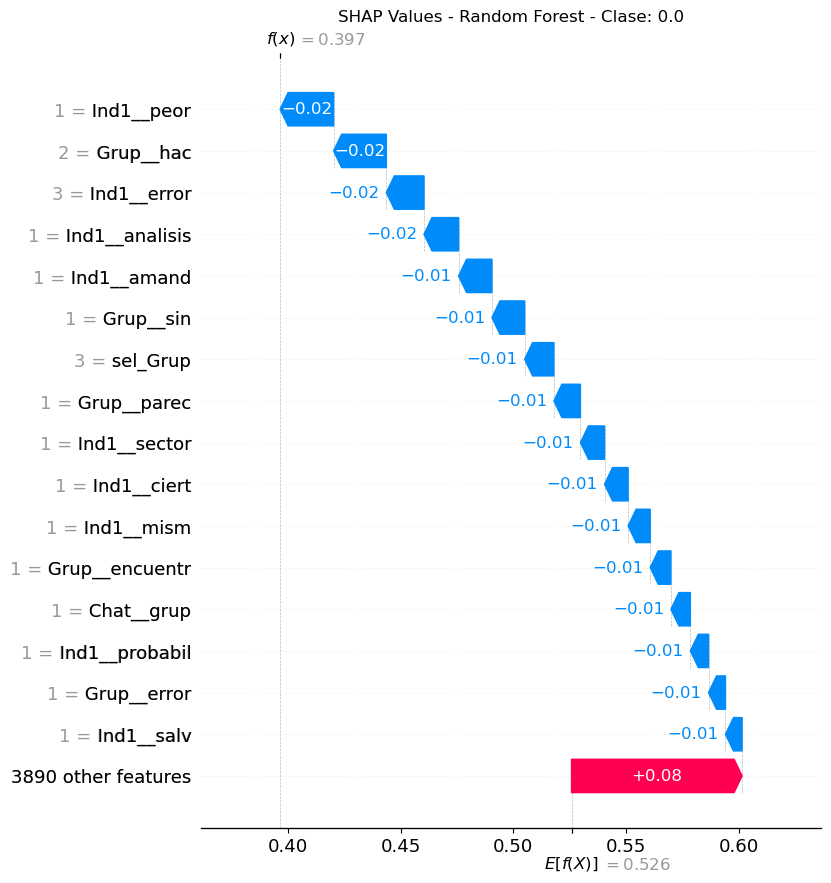

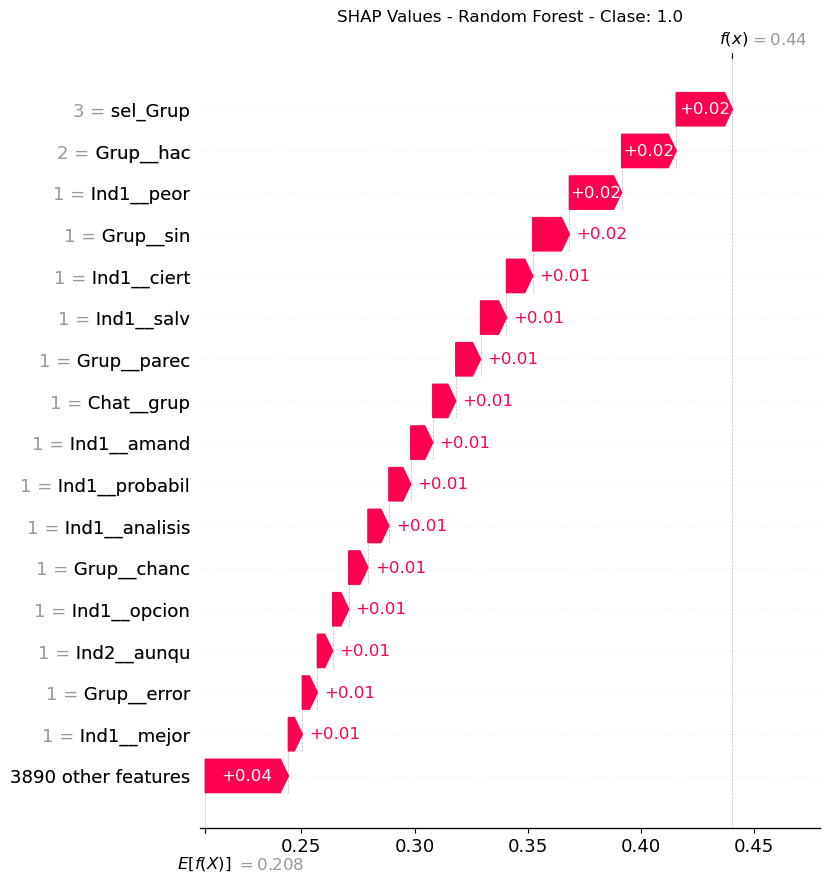

In [28]:
idx=1

individual_explanation(idx, rf_best_model, df_train, 'SHAP Values - Random Forest')

[17:18:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


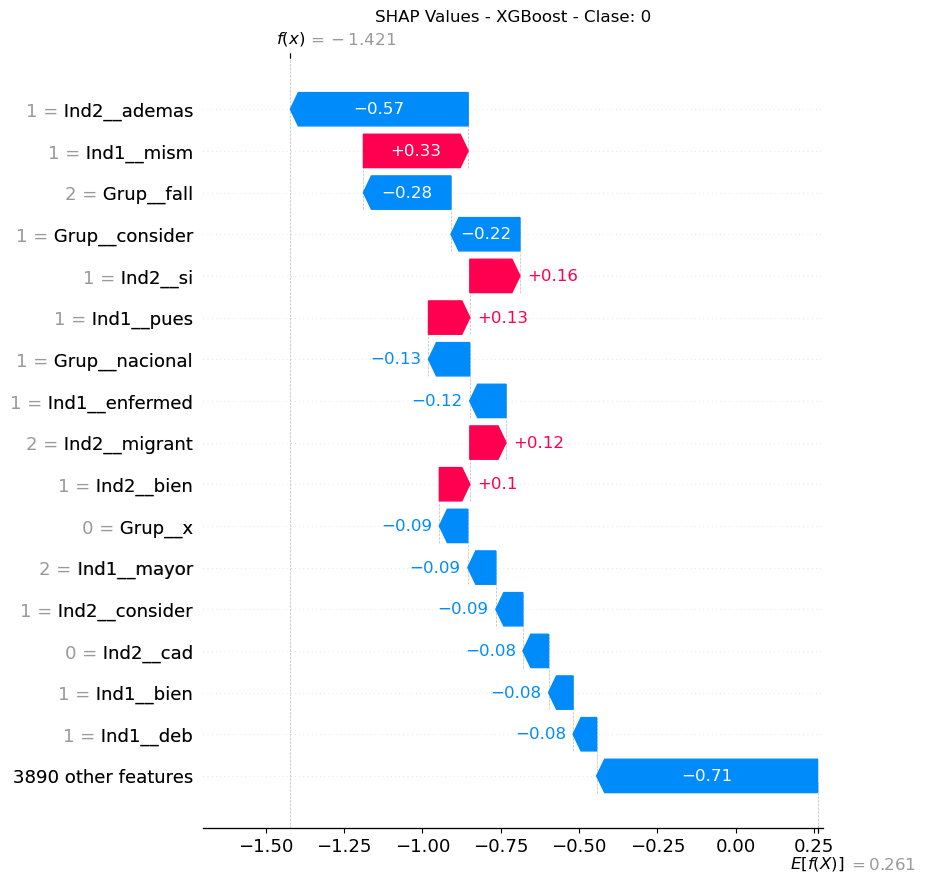

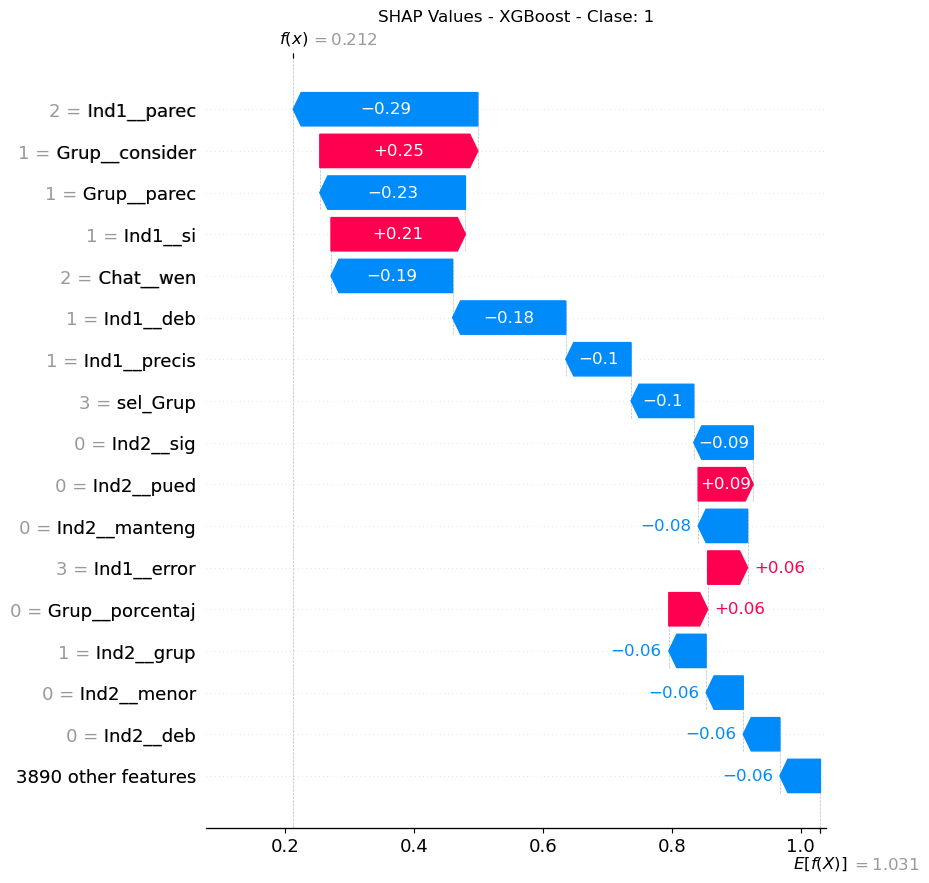

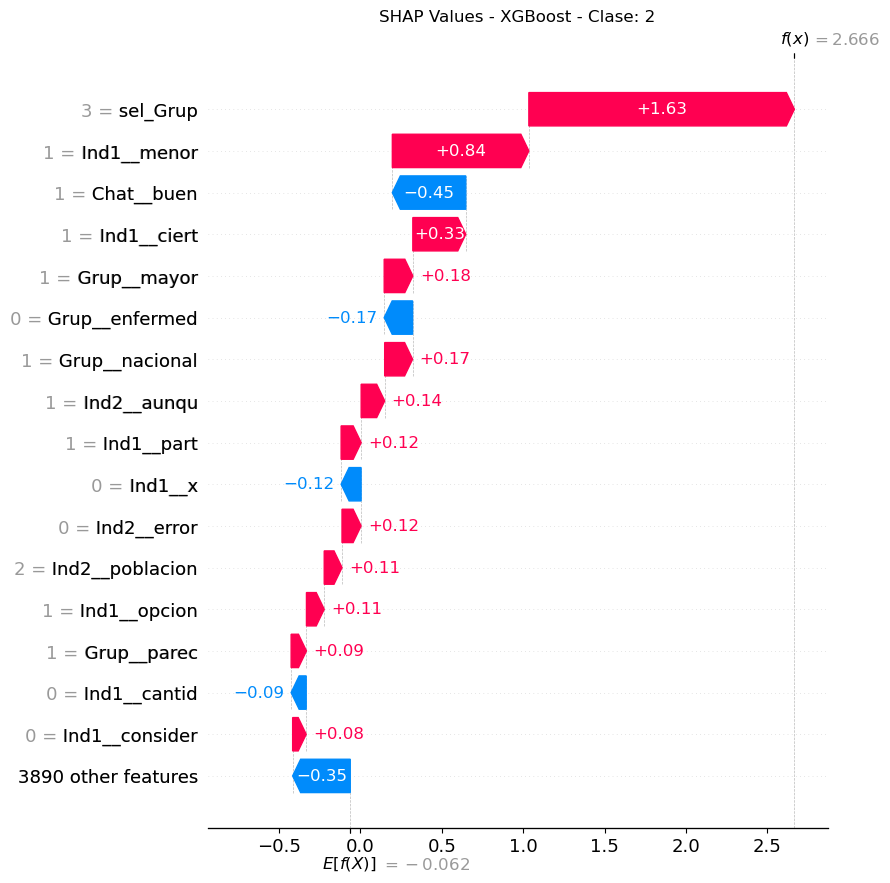

In [29]:
idx=1

individual_explanation(idx, xgb_best_model, df_train, 'SHAP Values - XGBoost')

## Modelo 4. Quitar justificación individual 2

In [30]:
df_train, df_test, y_train, y_test, categorical_preprocessing, text_preprocessing = preprocessing(
    dataset,
    gender=True, 
    comment_Ind2=False, 
    sel_Ind1=True
)
df_train

sel_Ind1  sel_Grup  gender:M  gender:F  gender:O  Ind1__0si  Ind1__1  \
180       1.0       1.0       0.0       1.0       0.0          0        0   
201       0.0       3.0       1.0       0.0       0.0          0        0   
174       1.0       1.0       1.0       0.0       0.0          0        0   
195       2.0       1.0       0.0       1.0       0.0          0        0   
187       1.0       0.0       1.0       0.0       0.0          0        0   
..        ...       ...       ...       ...       ...        ...      ...   
155       1.0       2.0       1.0       0.0       0.0          0        0   
102       1.0       4.0       1.0       0.0       0.0          0        0   
189       2.0       3.0       1.0       0.0       0.0          0        0   
239       1.0       2.0       1.0       0.0       0.0          0        0   
15        0.0       5.0       1.0       0.0       0.0          0        0   

     Ind1__100  Ind1__15  Ind1__155  ...  Chat__wenap  Chat__wenass  \
180          0         0          0  ...            0             0   
201          0         0          0  ...            0             0   
174          0         0          0  ...            0             0   
195          0         0          0  ...            0             0   
187          0         0          0  ...            0             0   
..         ...       ...        ...  ...          ...           ...   
155          0         0          0  ...            0             0   
102          0         0          0  ...            0             0   
189          0         0          0  ...            0             0   
239          0         0          0  ...            0             0   
15           0         0          0  ...            0             0   

     Chat__wifi  Chat__wol  Chat__x  Chat__x2  Chat__x3  Chat__xat  Chat__xd  \
180           0          0        0         0         0          0         0   
201           0          0        0         0         0          0         0   
174           0          0        0         0         0          0         0   
195           0          0        0         0         0          0         0   
187           0          0        0         0         0          0         0   
..          ...        ...      ...       ...       ...        ...       ...   
155           0          0        0         0         0          0         0   
102           0          0        0         0         0          0         0   
189           0          0        0         0         0          0         0   
239           0          0        0         0         0          0         0   
15            0          0        0         0         0          0         0   

     Chat__ª  
180        0  
201        0  
174        0  
195        0  
187        0  
..       ...  
155        0  
102        0  
189        0  
239        0  
15         0  

[328 rows x 2599 columns]

In [31]:
categorical_preprocessing

ColumnTransformer(transformers=[('sel_etapa',
                                 Pipeline(steps=[('ordinal_encoder',
                                                  OrdinalEncoder())]),
                                 ['sel_Ind1', 'sel_Grup', 'sel_Ind2']),
                                ('gender',
                                 Pipeline(steps=[('extract',
                                                  ColumnExtractor(columns=['gender'])),
                                                 ('onehot_encoder',
                                                  OneHotEncoder(categories=[['M',
                                                                             'F',
                                                                             'O']],
                                                                sparse_output=False))]),
                                 ['gender'])])

In [32]:
text_preprocessing

ColumnTransformer(transformers=[('Ind1',
                                 CountVectorizer(token_pattern=None,
                                                 tokenizer=<utils.StemmerTokenizer object at 0x000002BD86122E60>),
                                 'comment_Ind1'),
                                ('Grup',
                                 CountVectorizer(token_pattern=None,
                                                 tokenizer=<utils.StemmerTokenizer object at 0x000002BD86122E60>),
                                 'comment_Grup'),
                                ('Chat',
                                 CountVectorizer(token_pattern=None,
                                                 tokenizer=<utils.StemmerTokenizer object at 0x000002BD86122E60>),
                                 'summary')])

In [33]:
dummy_model, rf_best_model, xgb_best_model = train_models(df_train, df_test, y_train, y_test, grid_rf, grid_xgb)

Dummy classifier
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00        22
         0.0       0.53      1.00      0.69        44
         1.0       0.00      0.00      0.00        17

    accuracy                           0.53        83
   macro avg       0.18      0.33      0.23        83
weighted avg       0.28      0.53      0.37        83

Random Forest classifier
Best Hyperparameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00        22
         0.0       0.51      0.91      0.65        44
         1.0       0.00      0.00      0.00        17

    accuracy                           0.48        83
   macro avg       0.17      0.30      0.22        83
weighted avg       0.27      0.48      0.34        83

XGBoost classifier
Best Hyperparameters: {'max_leaves': 5, 'min_child_weight': 1, 'n_est

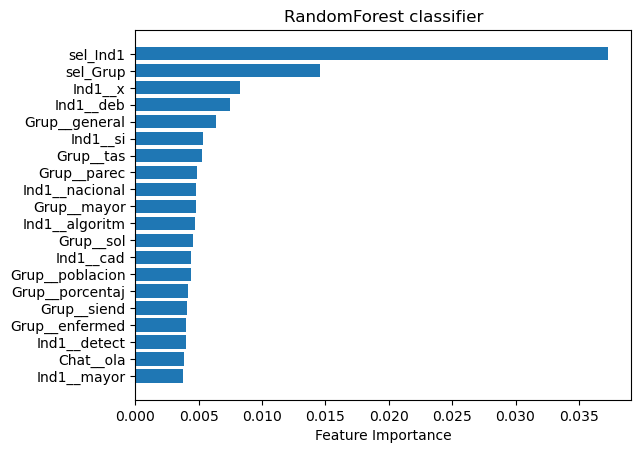

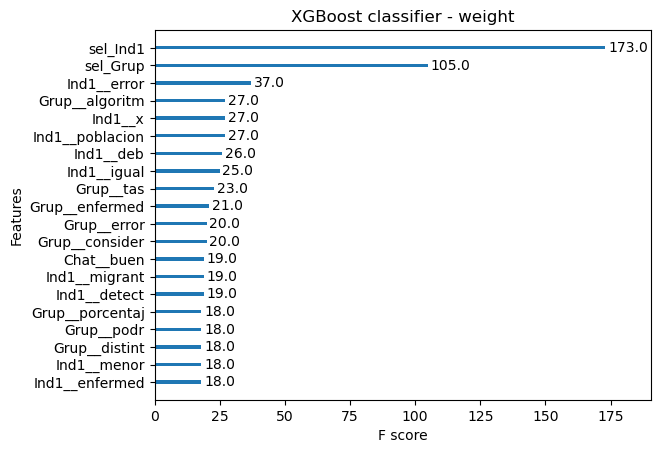

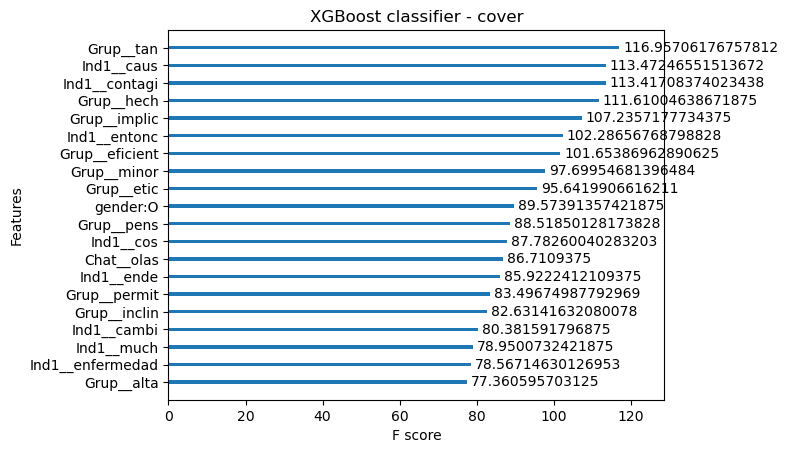

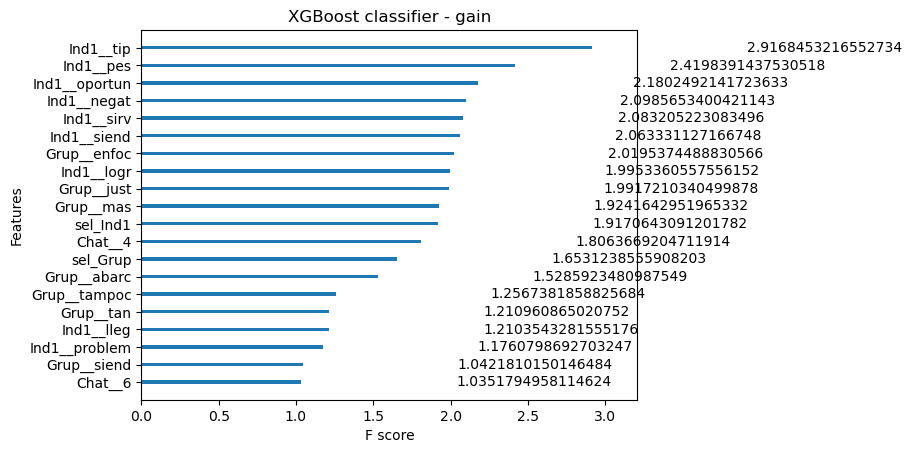

In [34]:
plot_importance_models(rf_best_model, xgb_best_model)

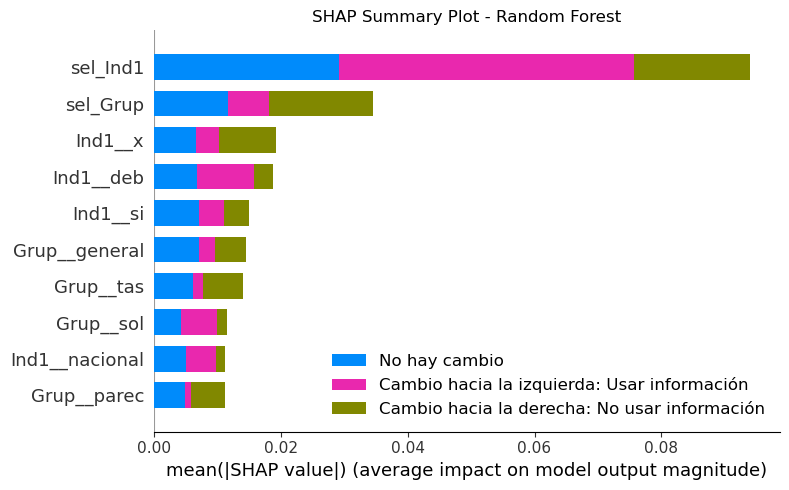

In [35]:
summary_plot(rf_best_model, df_train, 'SHAP Summary Plot - Random Forest')

[17:21:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


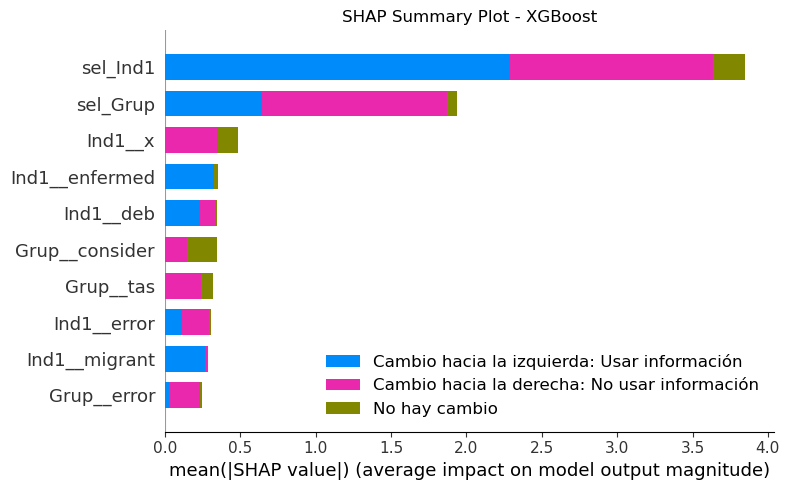

In [36]:
summary_plot(xgb_best_model, df_train, 'SHAP Summary Plot - XGBoost')

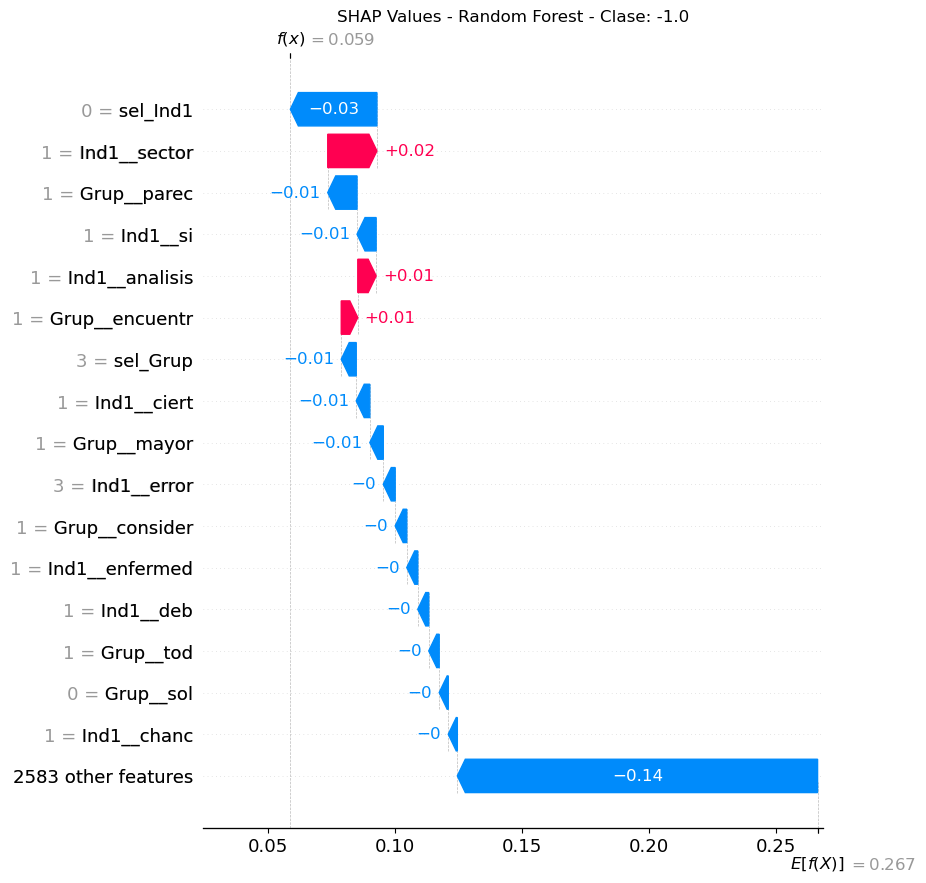

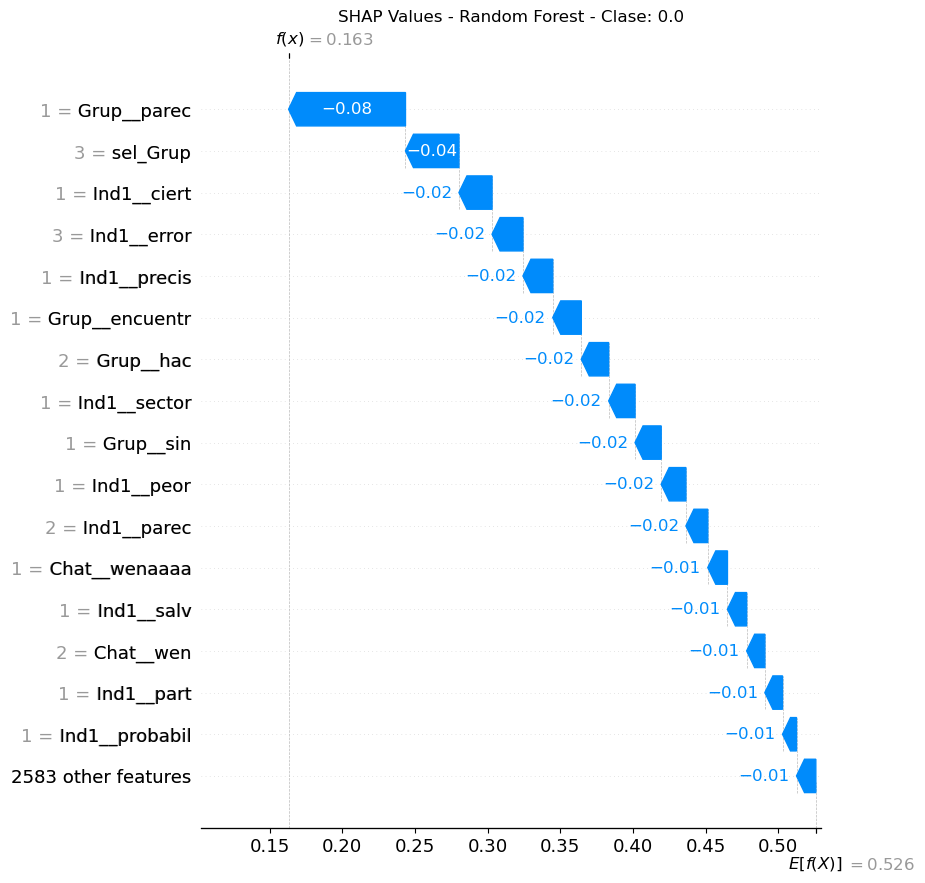

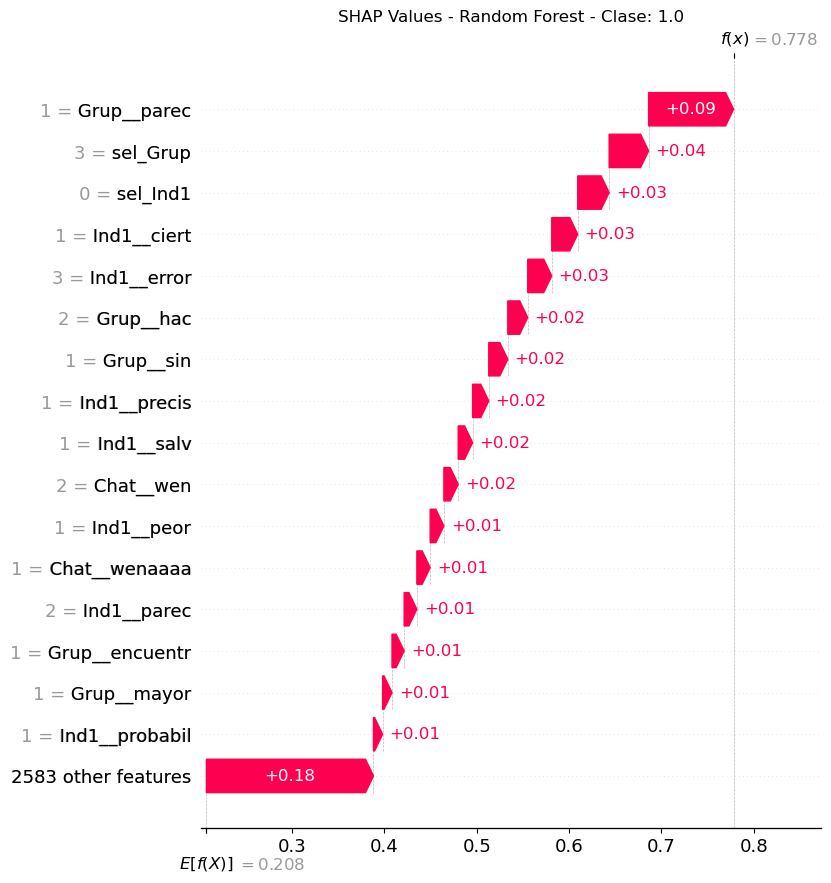

In [37]:
idx=1

individual_explanation(idx, rf_best_model, df_train, 'SHAP Values - Random Forest')

[17:22:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


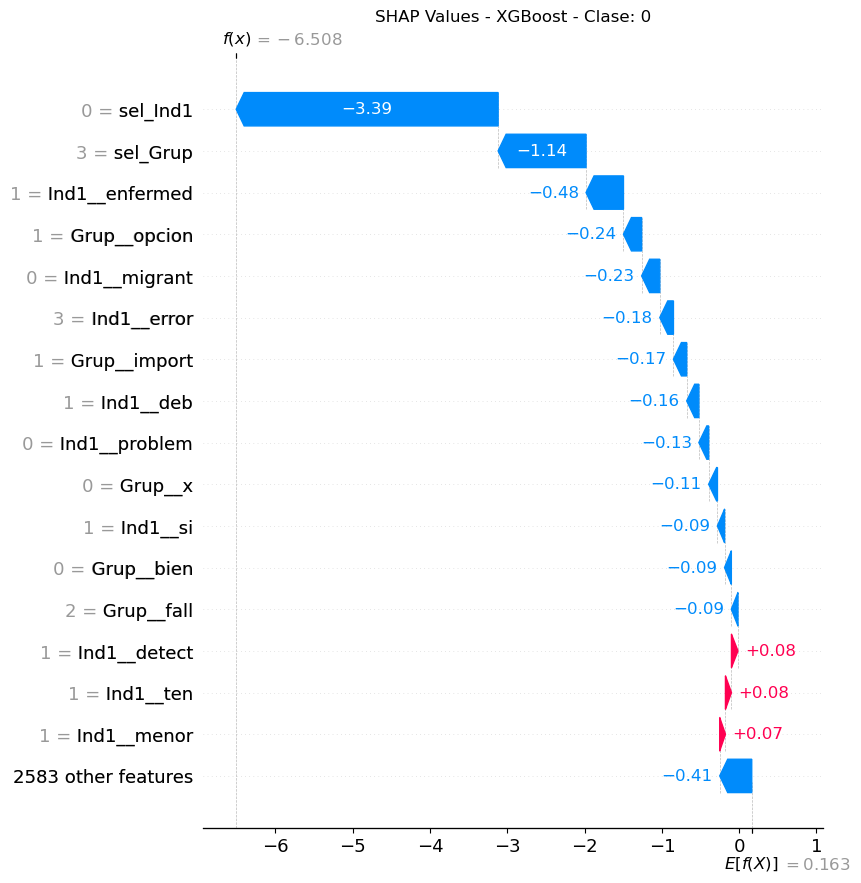

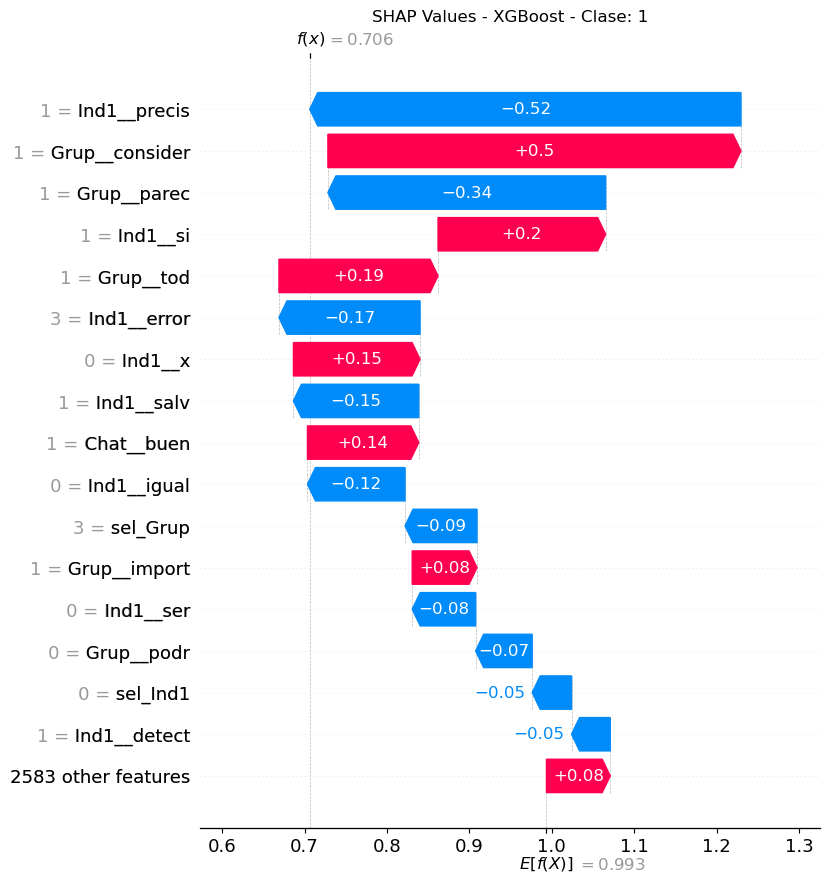

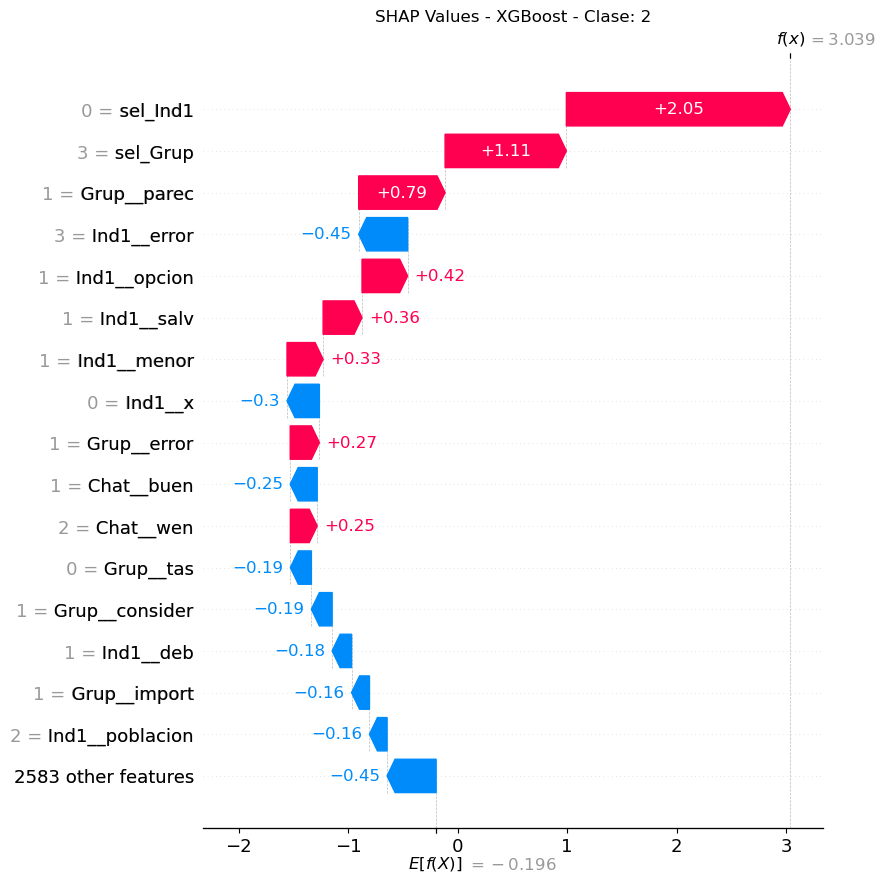

In [38]:
idx=1

individual_explanation(idx, xgb_best_model, df_train, 'SHAP Values - XGBoost')